<center>
  <span style="font-size:3.5em; font-weight:bold;">
    Company Bankruptcy
  </span>
</center>


<center>
  <span style="font-size:2.5em; font-weight:bold;">
    Imports
  </span>
</center>


In [1]:
#imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

<center>
  <span style="font-size:2.5em; font-weight:bold;">
    EDA
  </span>
</center>


In [ ]:
#doing the following because when I did dtype or something similar, output would get truncated (unscrollable version of truncated output)
#show all columns in DataFrame outputs
pd.set_option('display.max_columns', None)

#let pandas use the full width of the Jupyter output cell
pd.set_option('display.width', 0)

#prevent truncation of long cell contents
pd.set_option('display.max_colwidth', None)

In [3]:
main_df = pd.read_csv('Dataset.csv')
print(main_df.isnull().sum().to_list())
# print(main_df.head())
print(main_df.columns.tolist()) 
# note: after you run the line above, you see that the column names start with a space char 
main_df.rename(columns=lambda x: x[1:] if x[0] == ' ' else x, inplace=True)
print(main_df.columns.tolist())


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Reven

In [4]:
a = list(main_df.dtypes)
b = list(main_df.columns)
for i in range(len(a)): #reason for for loop is just for personal formatting preferences
    print(str(b[i]), ':', str(a[i]))

Bankrupt? : int64
ROA(C) before interest and depreciation before interest : float64
ROA(A) before interest and % after tax : float64
ROA(B) before interest and depreciation after tax : float64
Operating Gross Margin : float64
Realized Sales Gross Margin : float64
Operating Profit Rate : float64
Pre-tax net Interest Rate : float64
After-tax net Interest Rate : float64
Non-industry income and expenditure/revenue : float64
Continuous interest rate (after tax) : float64
Operating Expense Rate : float64
Research and development expense rate : float64
Cash flow rate : float64
Interest-bearing debt interest rate : float64
Tax rate (A) : float64
Net Value Per Share (B) : float64
Net Value Per Share (A) : float64
Net Value Per Share (C) : float64
Persistent EPS in the Last Four Seasons : float64
Cash Flow Per Share : float64
Revenue Per Share (Yuan ¥) : float64
Operating Profit Per Share (Yuan ¥) : float64
Per Share Net profit before tax (Yuan ¥) : float64
Realized Sales Gross Profit Growth Rat

In [5]:
#turn the "Bankrupt?" column into boolean 
print(main_df['Bankrupt?'].value_counts())
main_df['Bankrupt?'] = main_df['Bankrupt?'].astype('bool')

#check Net Income Flag, Liability-Assets Flag and their values
print(main_df['Net Income Flag'].value_counts())
print(main_df['Liability-Assets Flag'].value_counts())

main_df['Net Income Flag'] = main_df['Net Income Flag'].astype('bool')
main_df['Liability-Assets Flag'] = main_df['Liability-Assets Flag'].astype('bool')

#try to understand Research and development expense rate --> lot of 0s
print(main_df['Research and development expense rate'].value_counts()) #there are 1400+ 0s and the remaining are other values

Bankrupt?
0    6599
1     220
Name: count, dtype: int64
Net Income Flag
1    6819
Name: count, dtype: int64
Liability-Assets Flag
0    6811
1       8
Name: count, dtype: int64
Research and development expense rate
0.000000e+00    1424
4.410000e+08      22
6.450000e+08      21
8.150000e+08      21
3.230000e+08      19
                ... 
9.370000e+09       1
2.353225e-04       1
9.490000e+09       1
2.399067e-04       1
3.686040e-04       1
Name: count, Length: 1536, dtype: int64


In [6]:
main_df.describe()

ROA(C) before interest and depreciation before interest  \
count                                              6819.000000   
mean                                                  0.505180   
std                                                   0.060686   
min                                                   0.000000   
25%                                                   0.476527   
50%                                                   0.502706   
75%                                                   0.535563   
max                                                   1.000000   

       ROA(A) before interest and % after tax  \
count                             6819.000000   
mean                                 0.558625   
std                                  0.065620   
min                                  0.000000   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  1.000000   

       ROA(B) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.553589   
std                                             0.061595   
min                                             0.000000   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             1.000000   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             6819.000000                  6819.000000   
mean                 0.607948                     0.607929   
std                  0.016934                     0.016916   
min                  0.000000                     0.000000   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  1.000000                     1.000000   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            6819.000000                6819.000000   
mean                0.998755                   0.797190   
std                 0.013010                   0.012869   
min                 0.000000                   0.000000   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 1.000000                   1.000000   

       After-tax net Interest Rate  \
count                  6819.000000   
mean                      0.809084   
std                       0.013601   
min                       0.000000   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       1.000000   

       Non-industry income and expenditure/revenue  \
count                                  6819.000000   
mean                                      0.303623   
std                                       0.011163   
min                                       0.000000   
25%                                       0.303466   
50%                                       0.303525   
75%                                       0.303585   
max                                       1.000000   

       Continuous interest rate (after tax)  Operating Expense Rate  \
count                           6819.000000            6.819000e+03   
mean                               0.781381            1.995347e+09   
std                                0.012679            3.237684e+09   
min                                0.000000            0.000000e+00   
25%                                0.781567            1.566874e-04   
50%                                0.781635            2.777589e-04   
75%        

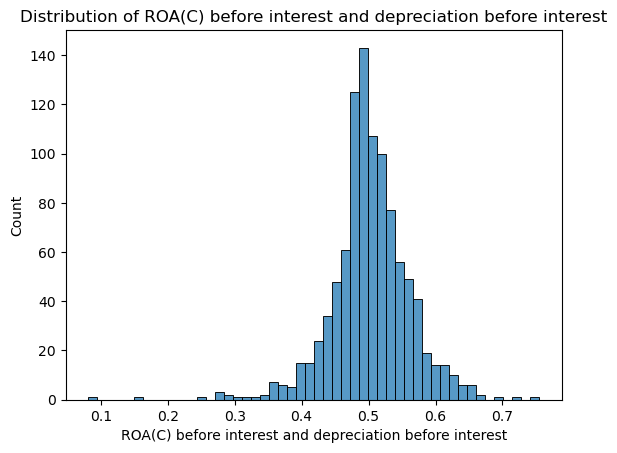

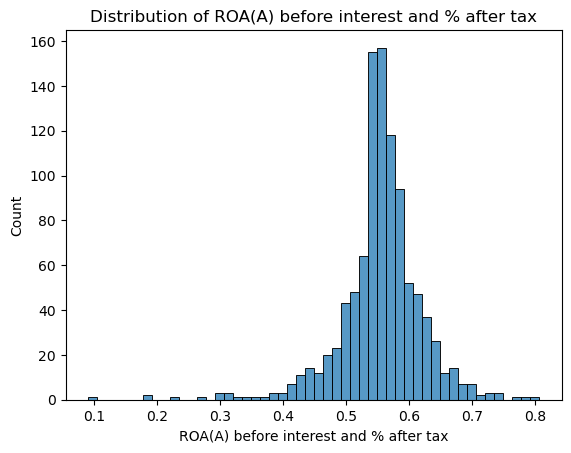

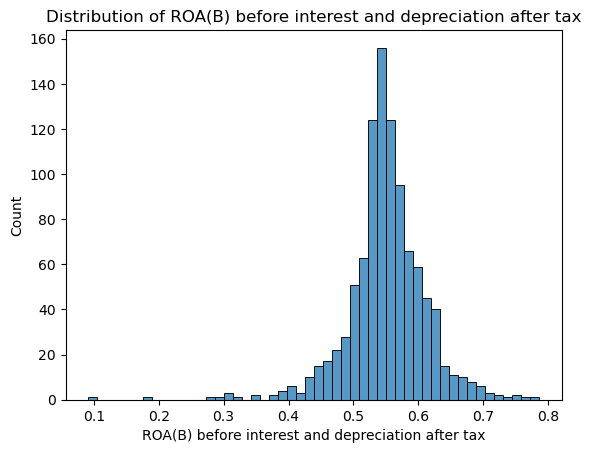

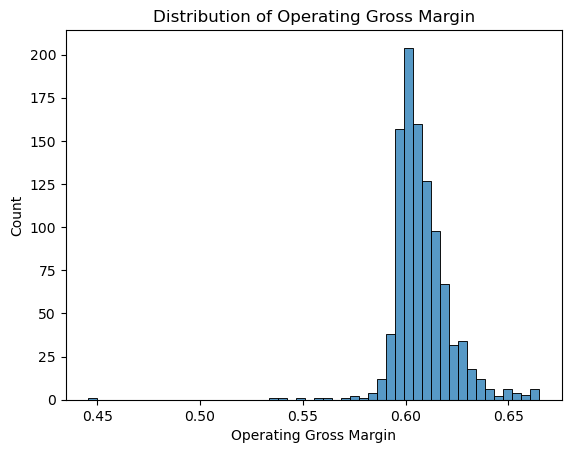

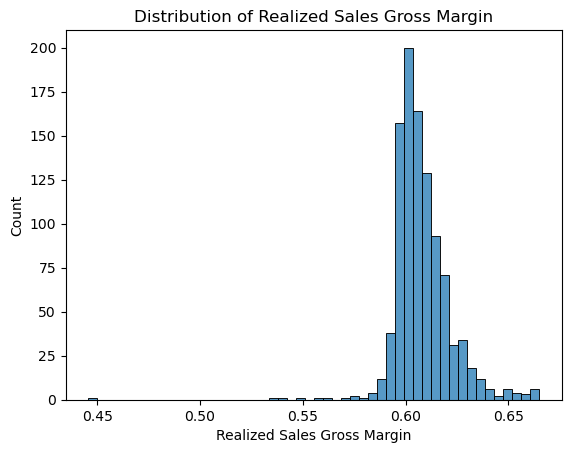

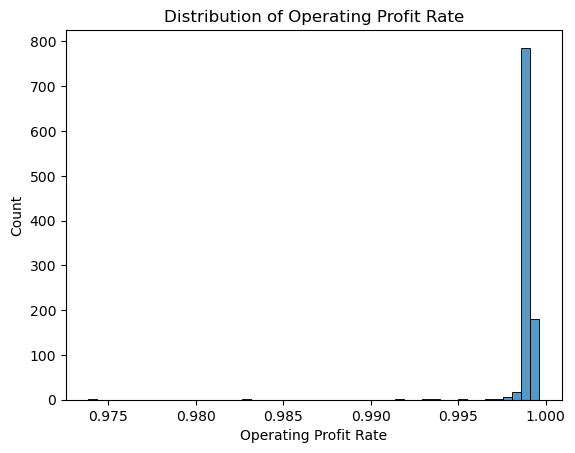

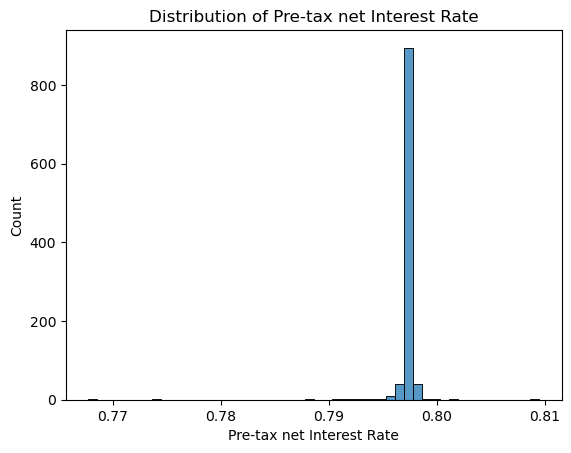

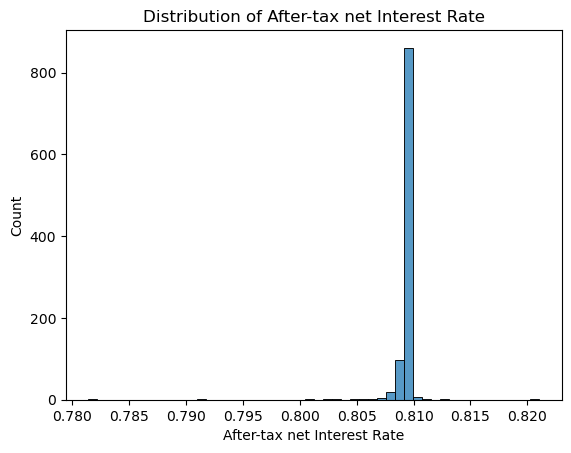

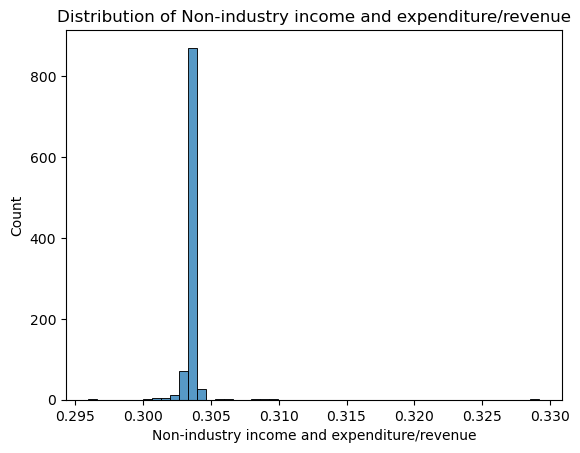

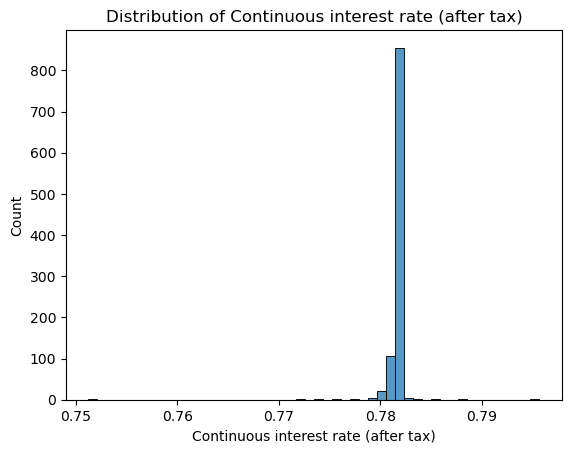

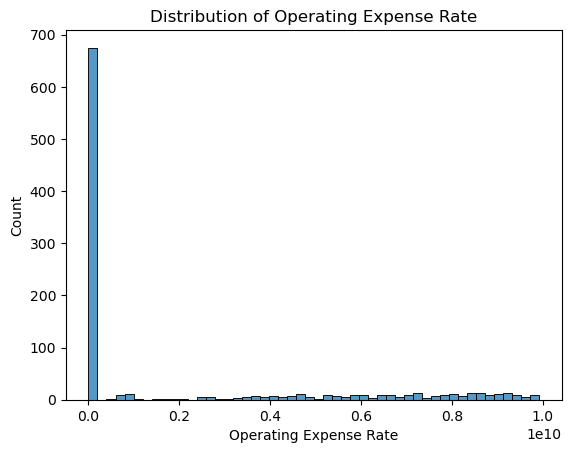

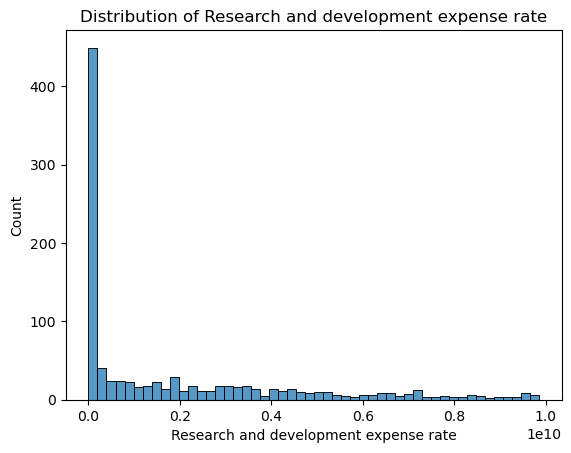

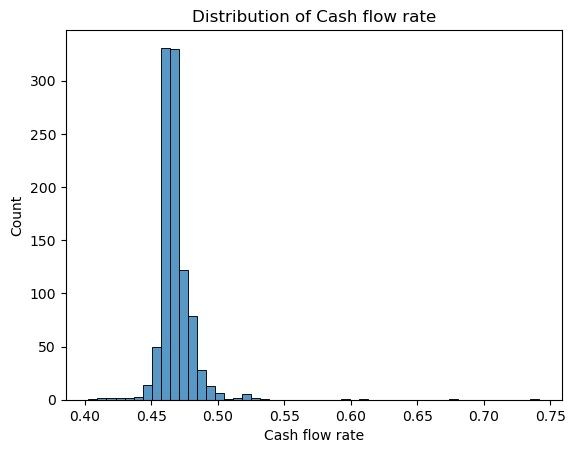

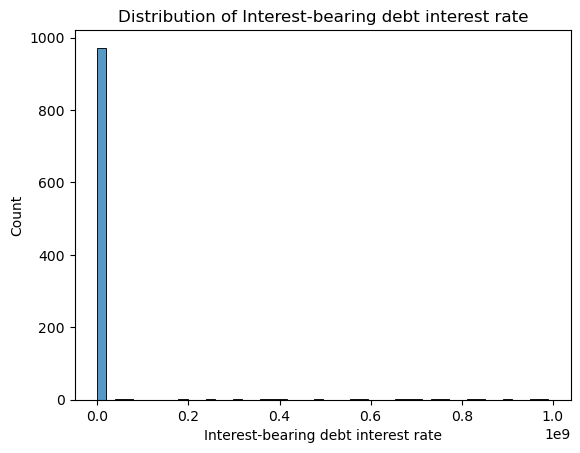

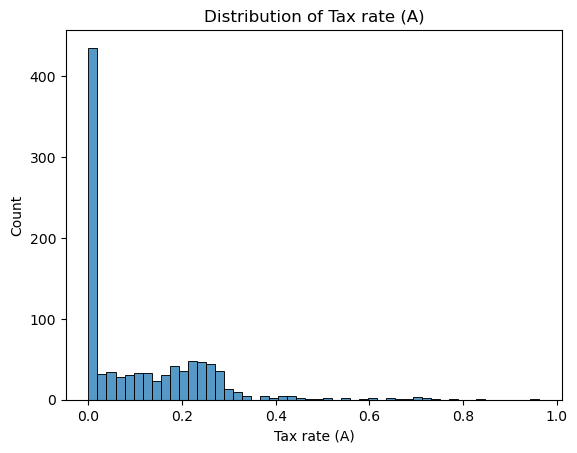

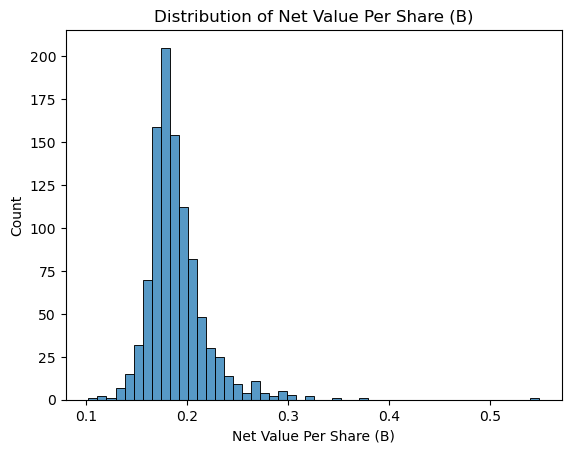

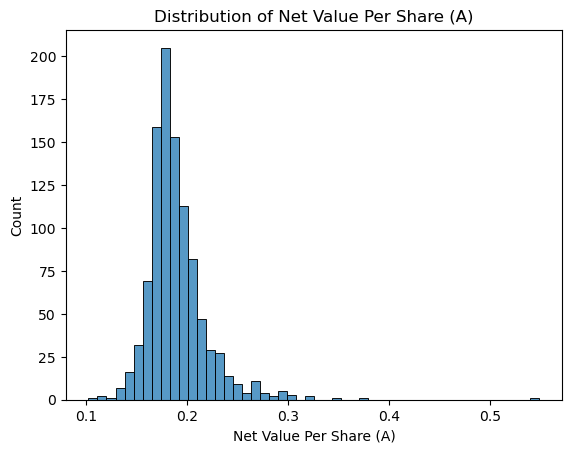

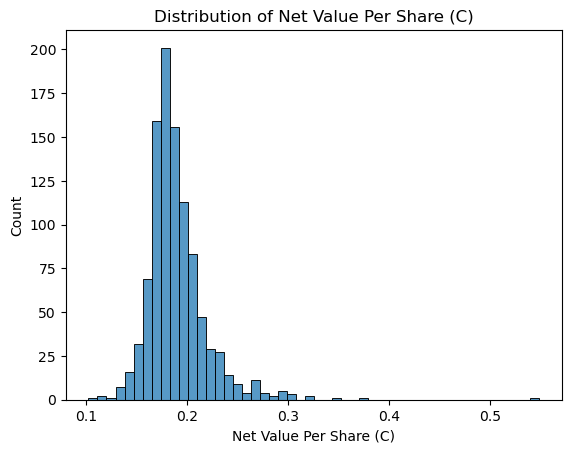

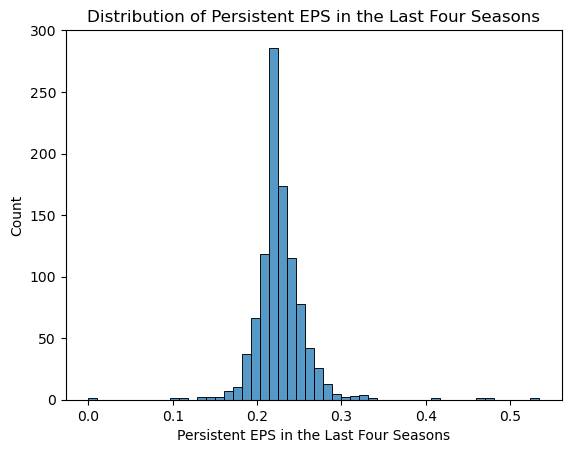

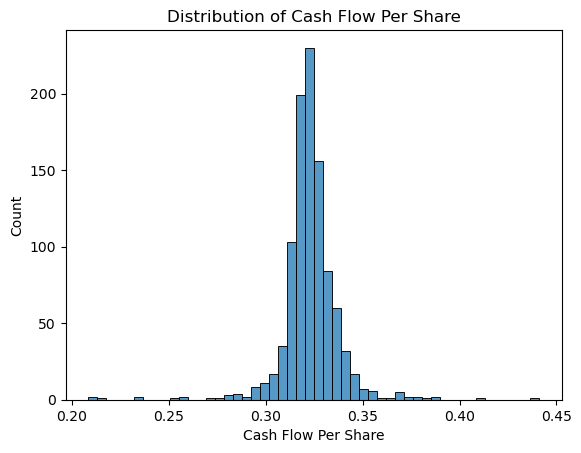

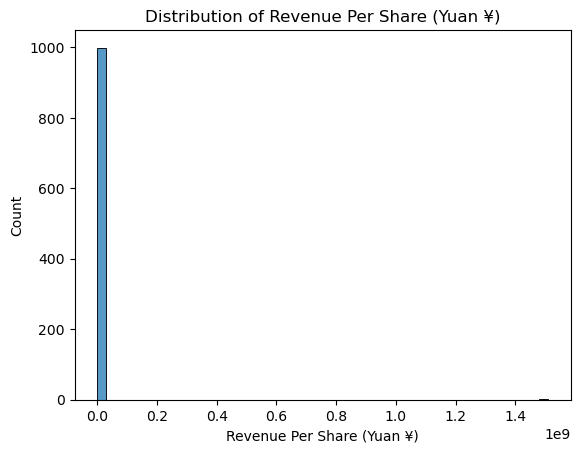

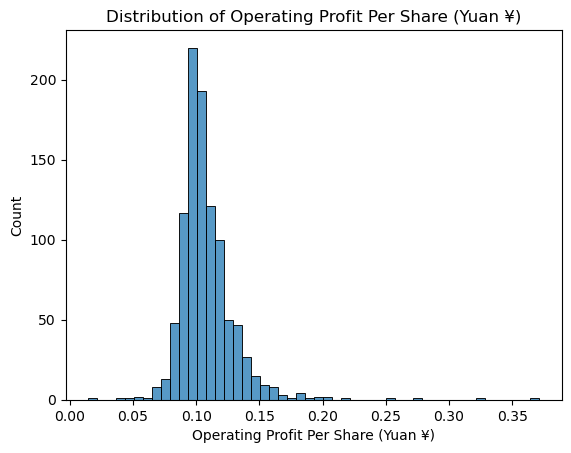

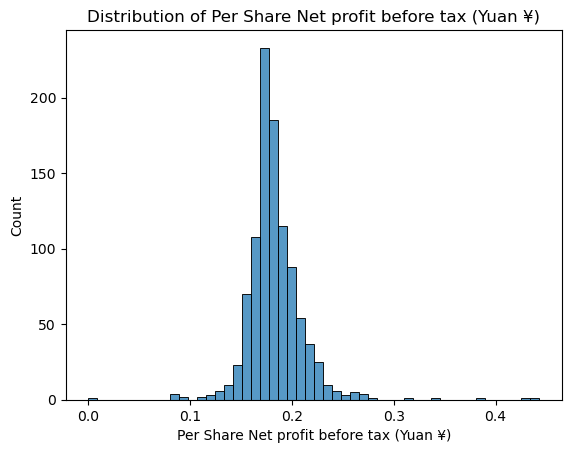

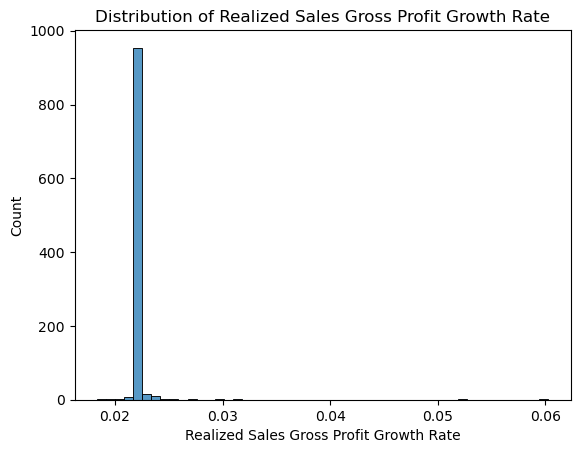

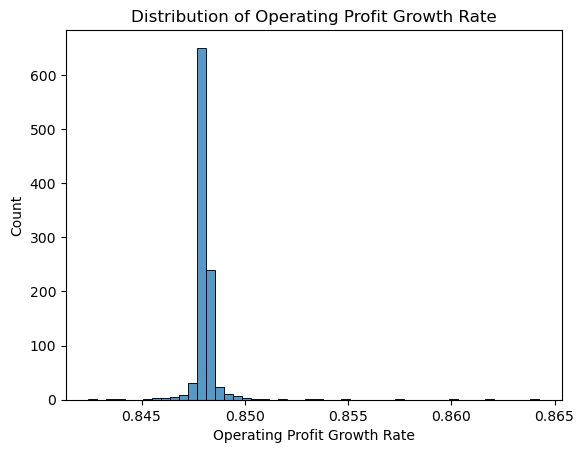

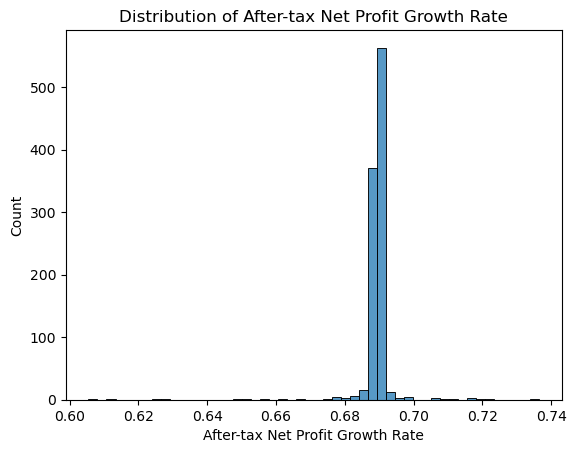

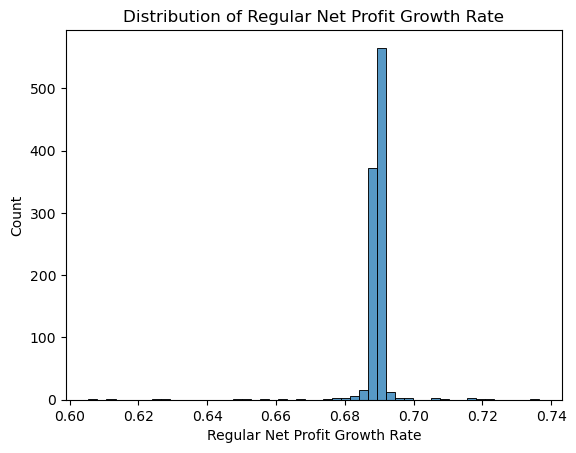

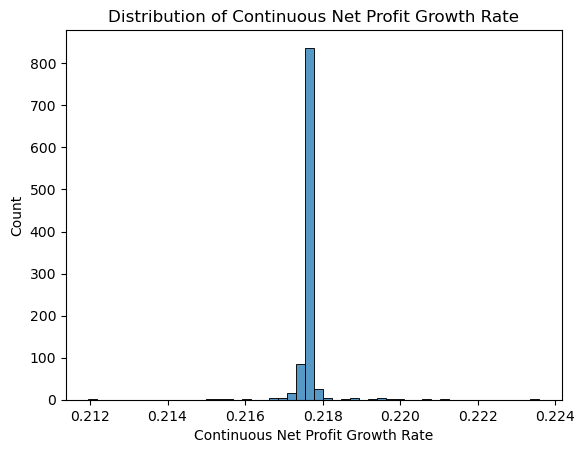

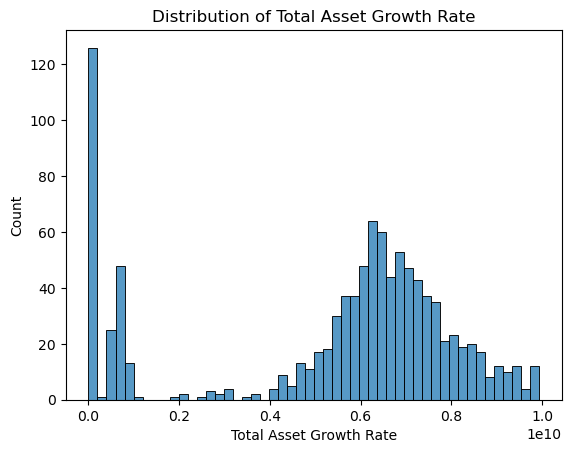

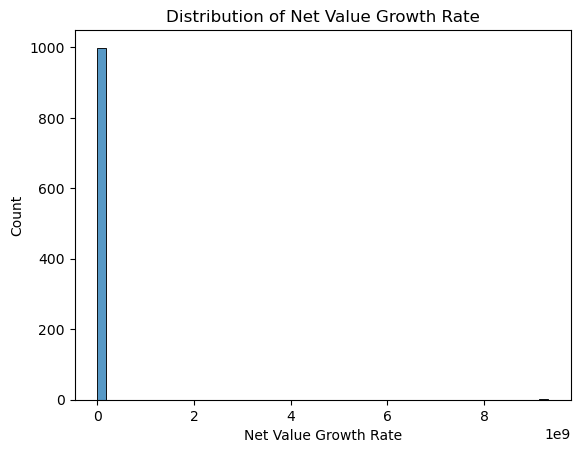

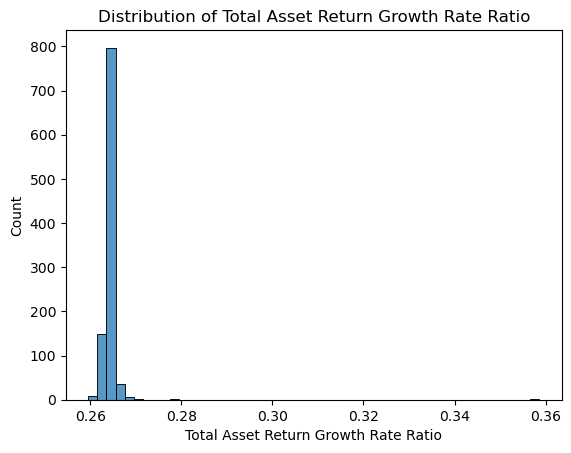

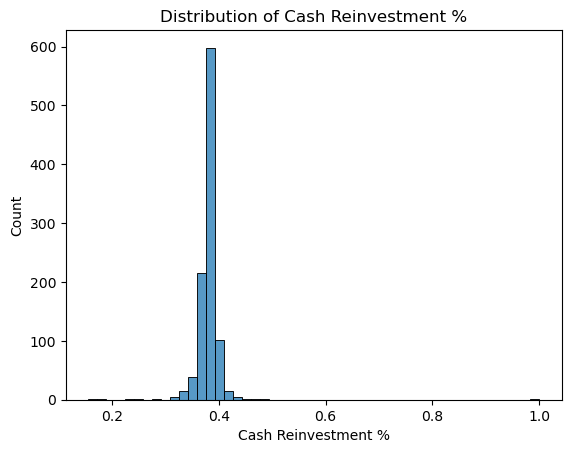

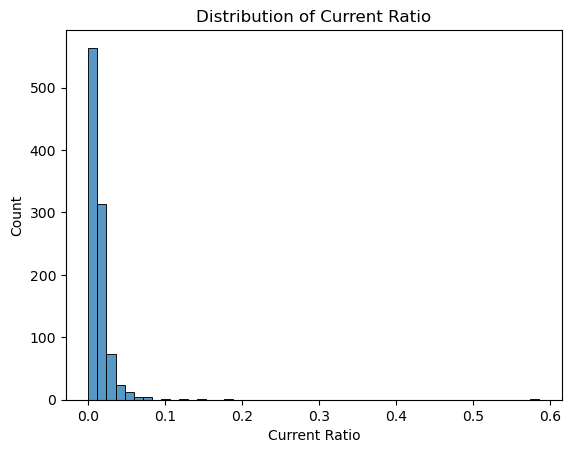

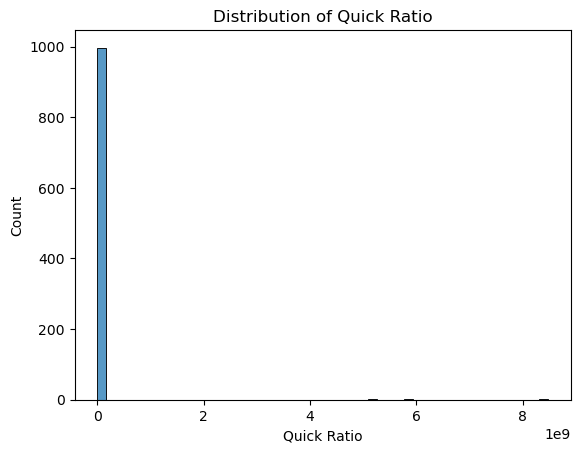

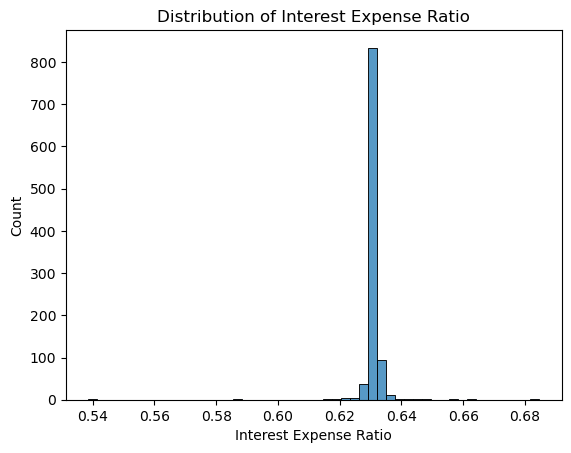

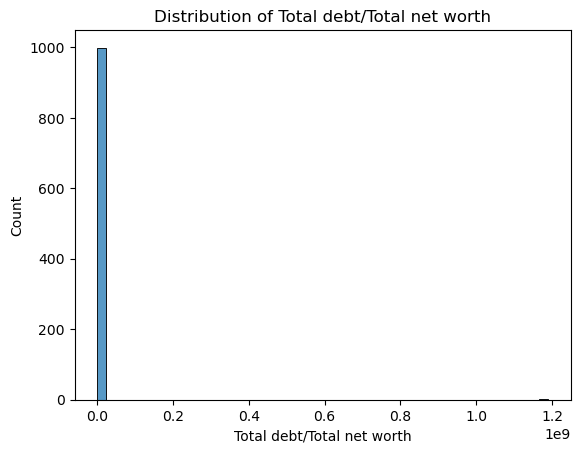

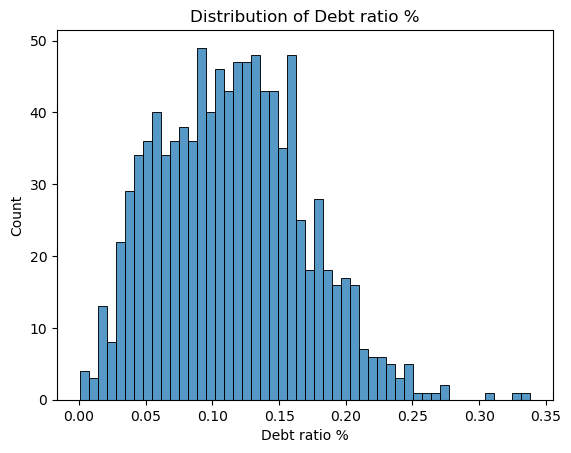

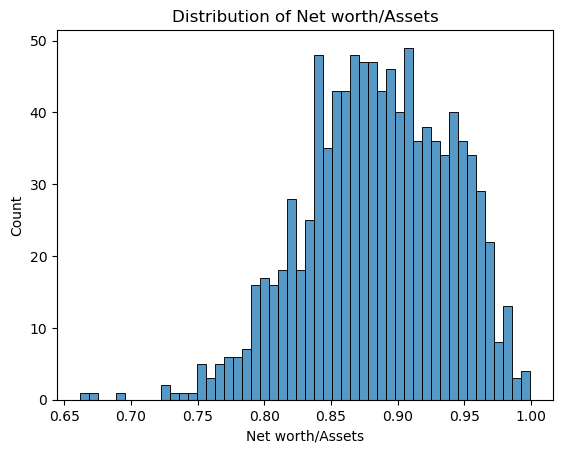

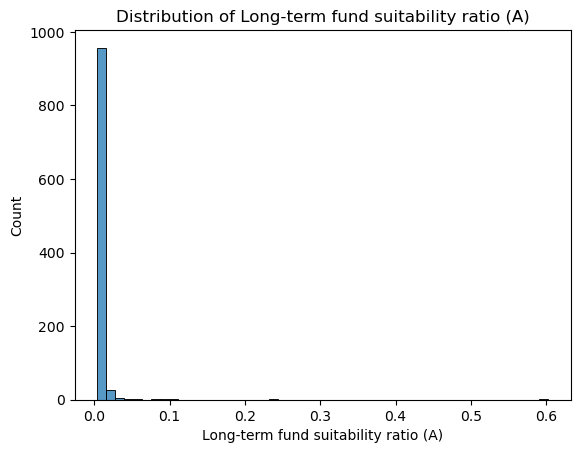

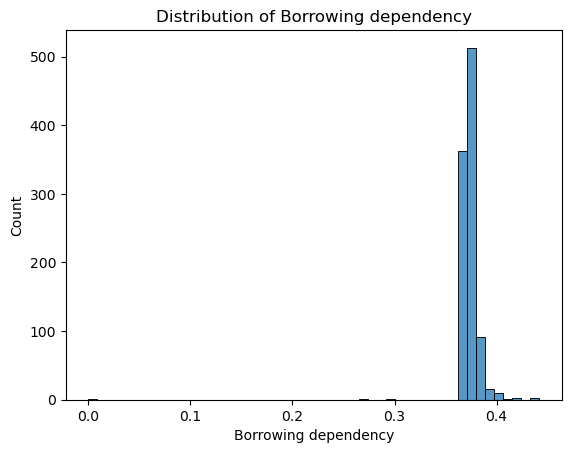

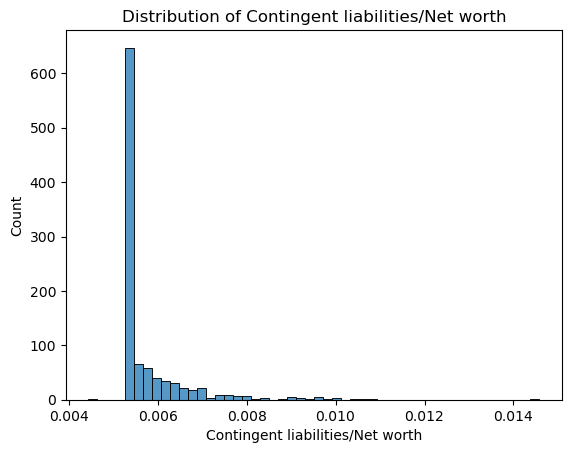

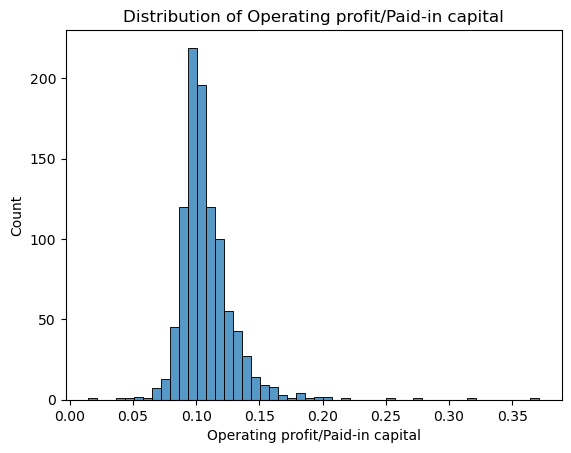

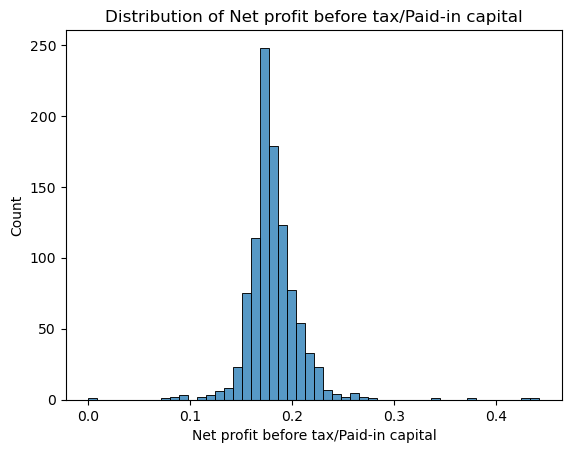

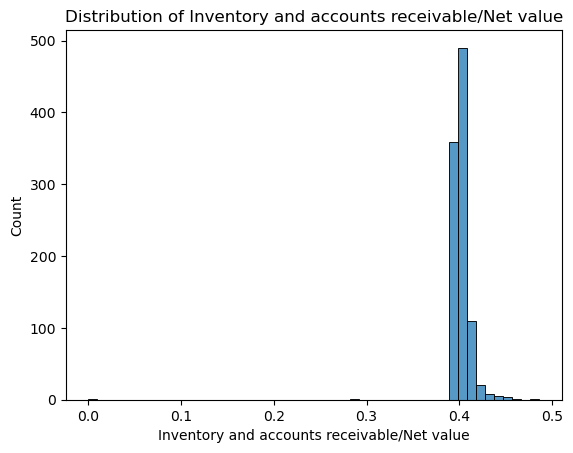

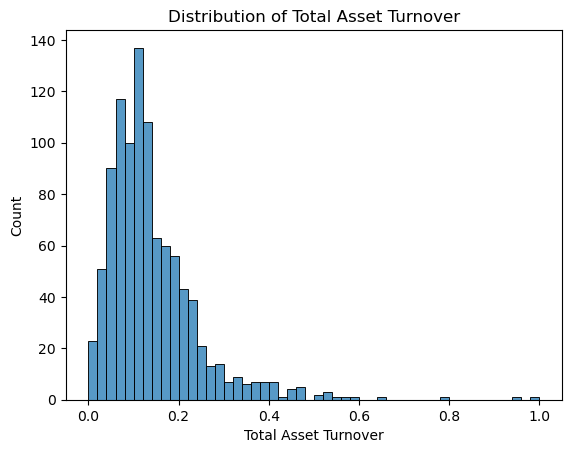

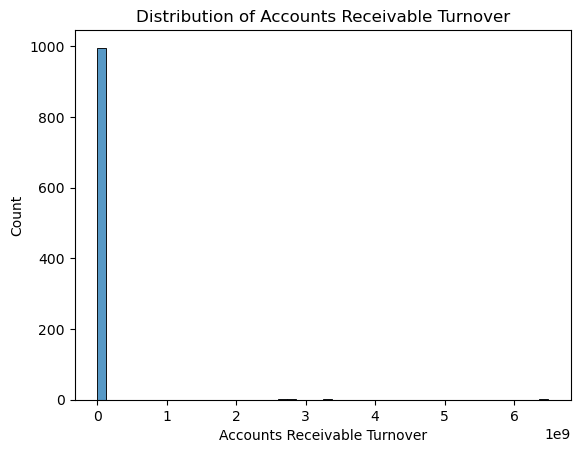

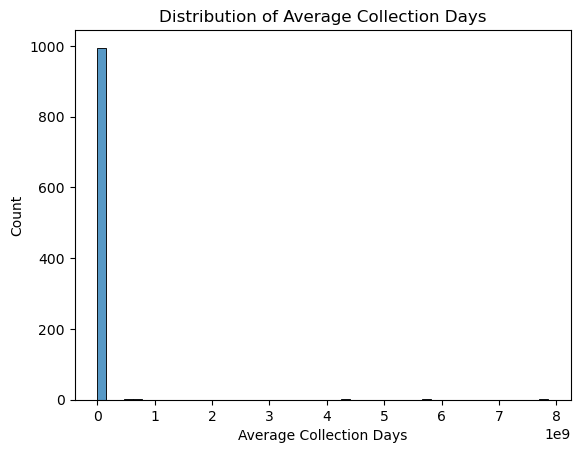

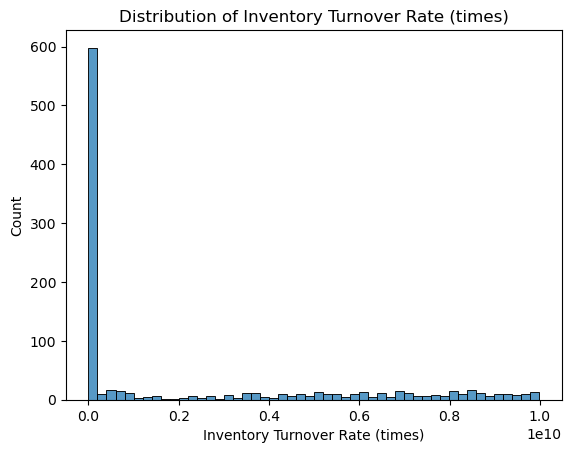

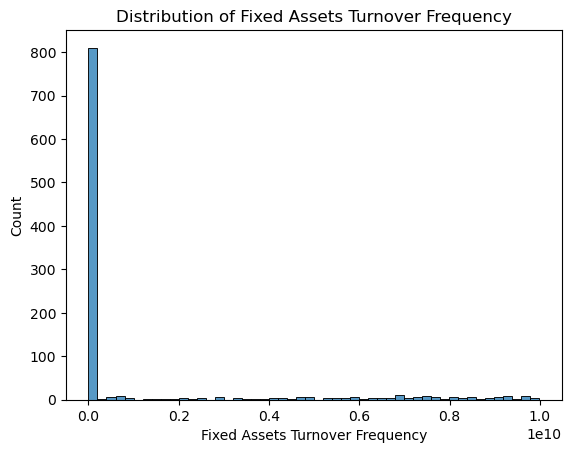

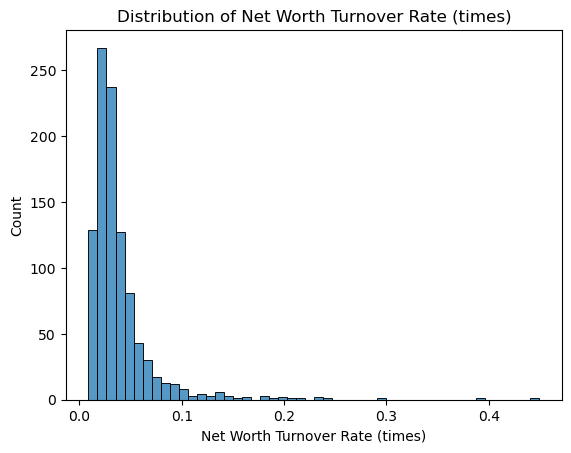

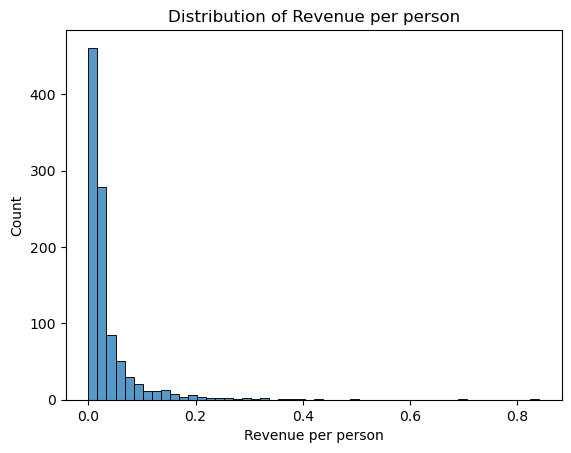

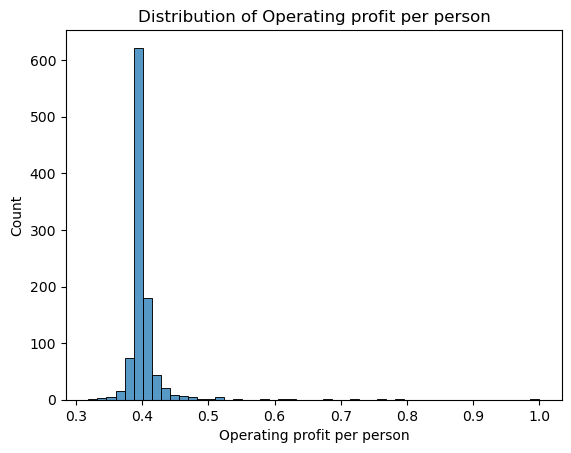

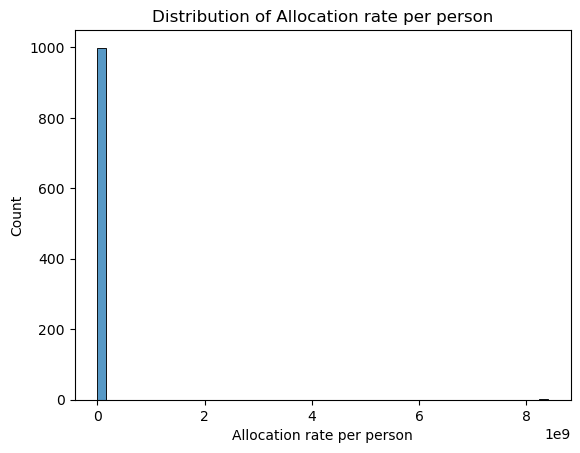

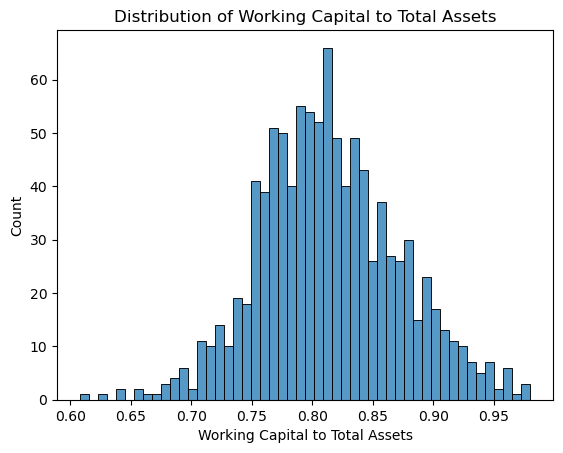

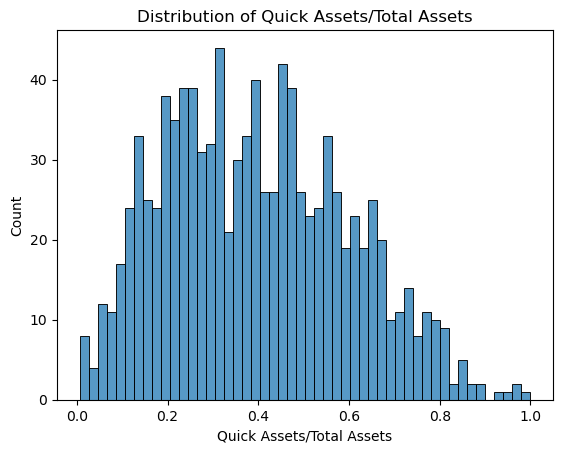

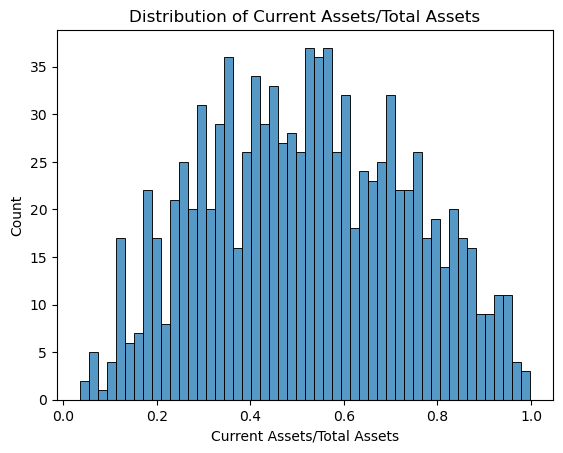

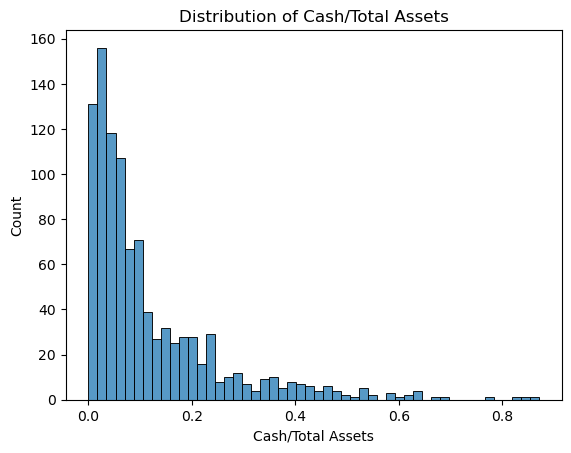

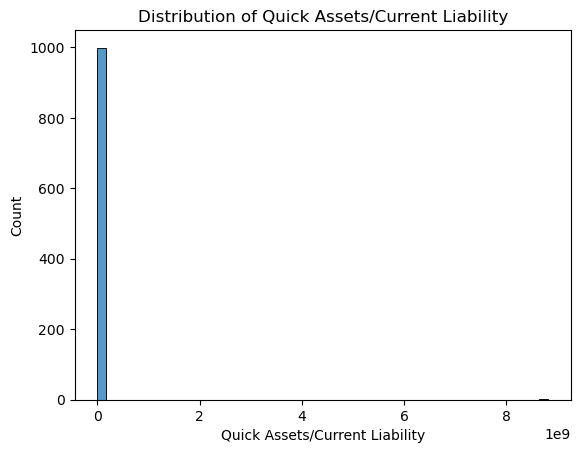

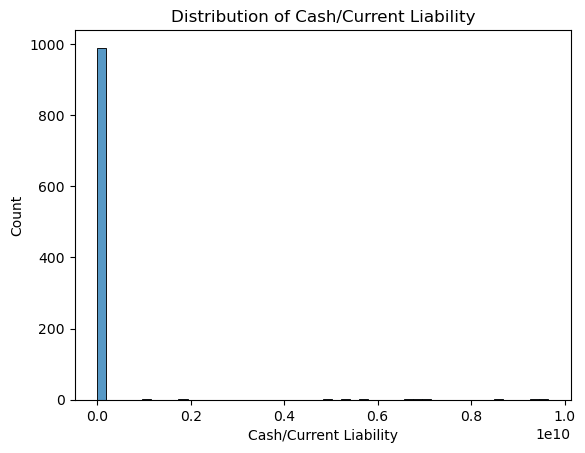

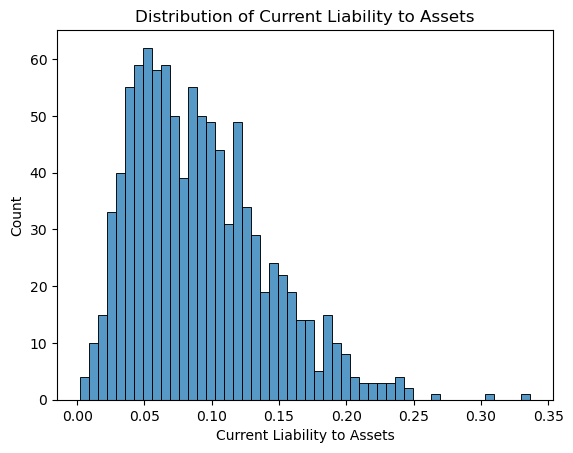

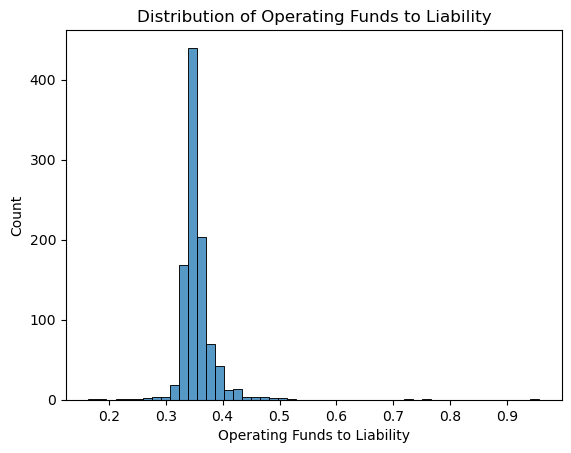

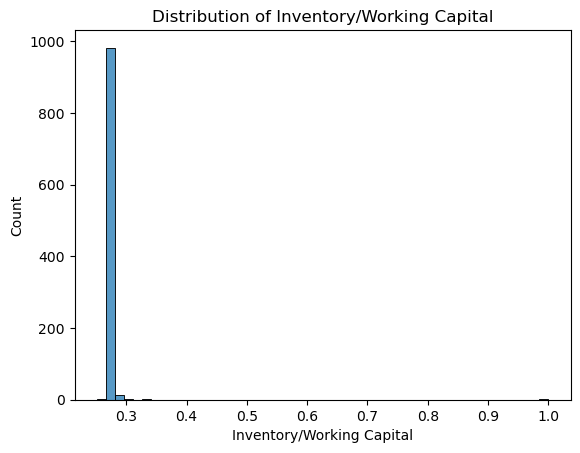

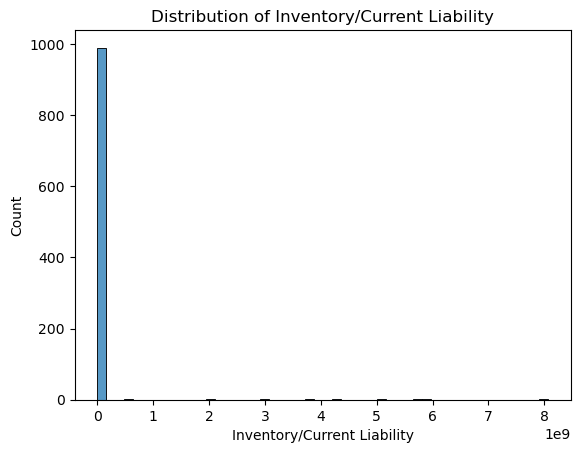

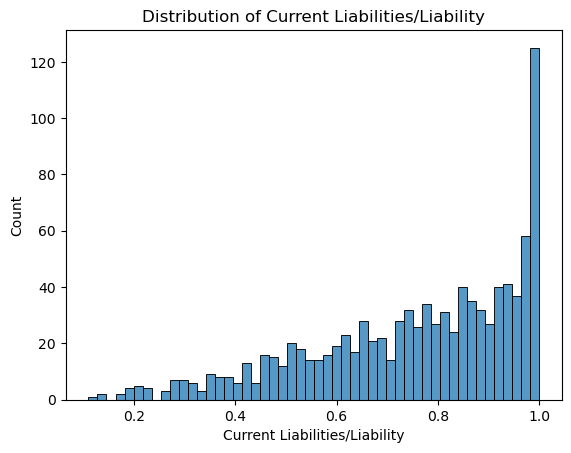

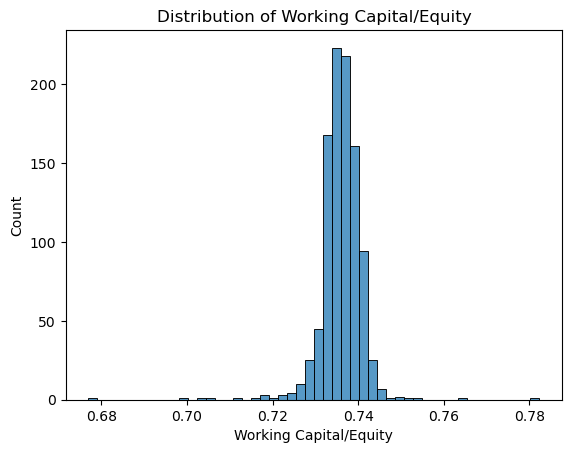

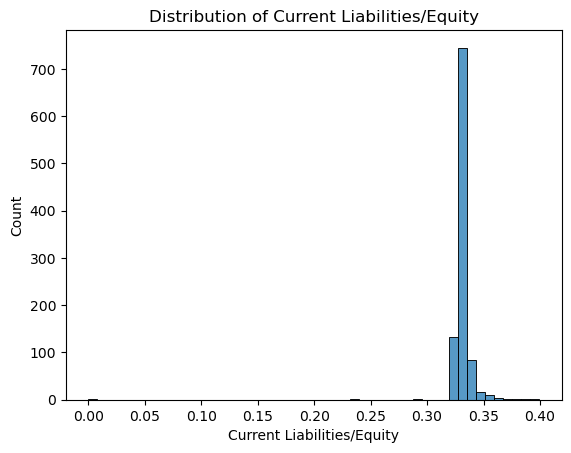

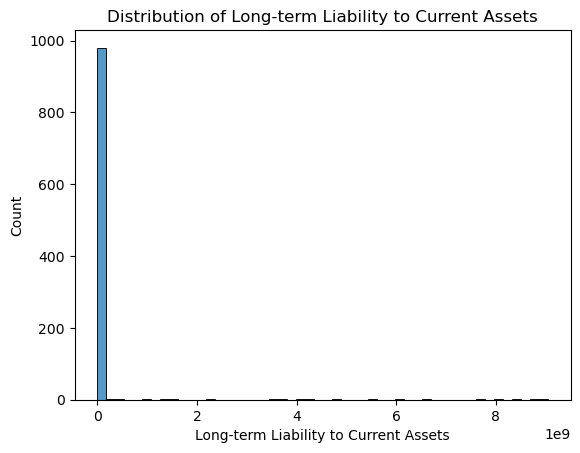

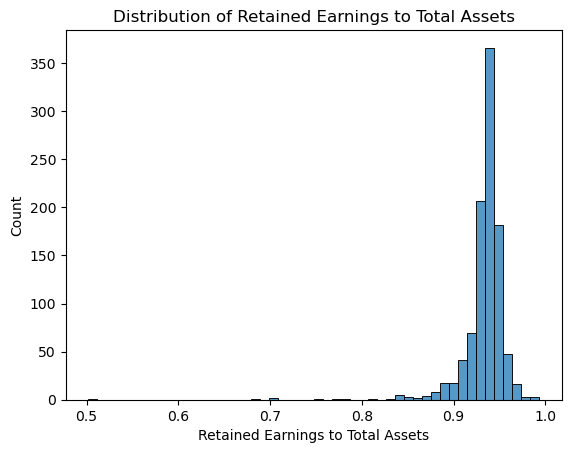

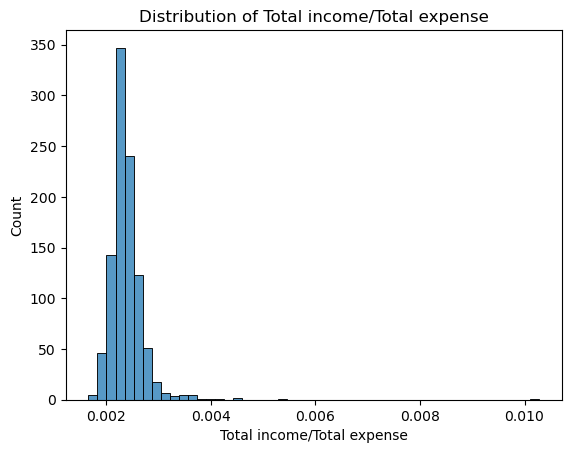

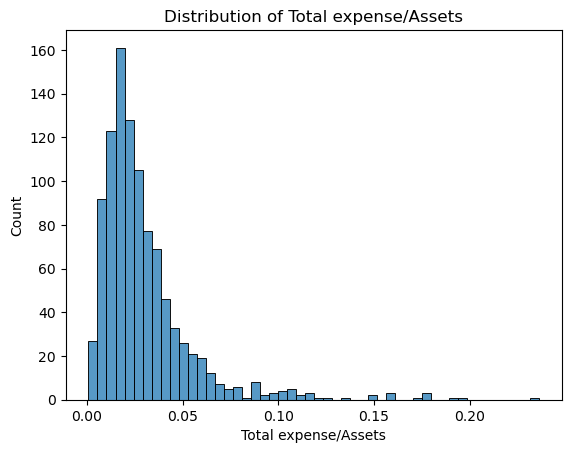

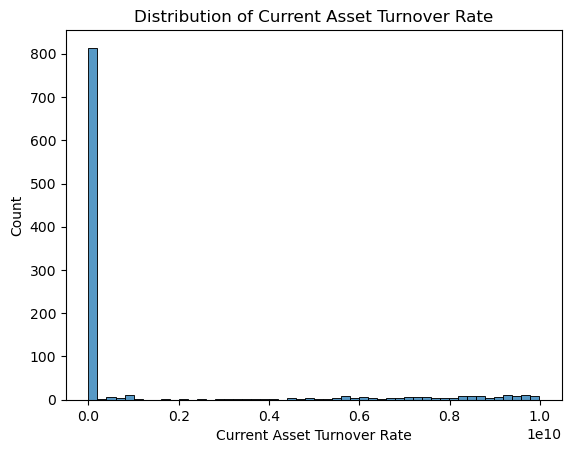

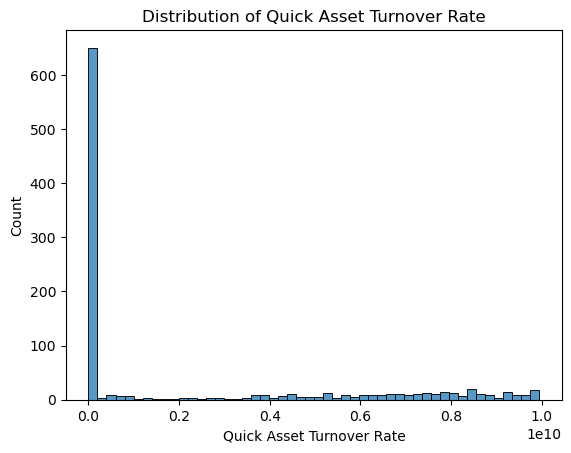

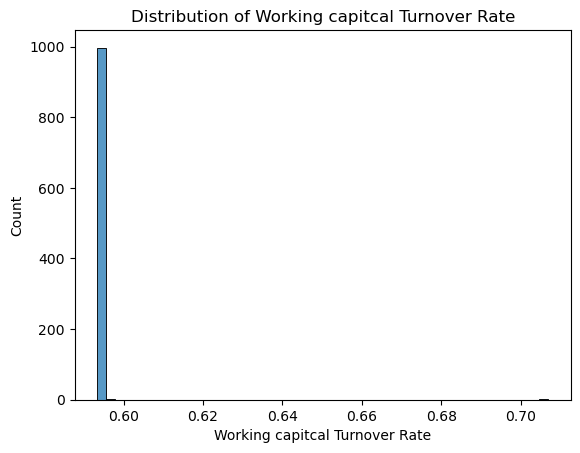

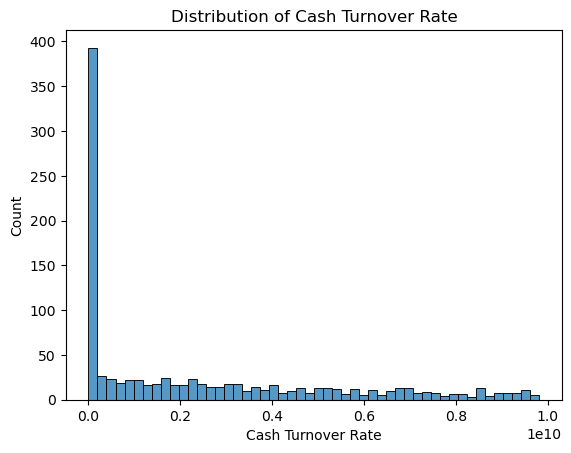

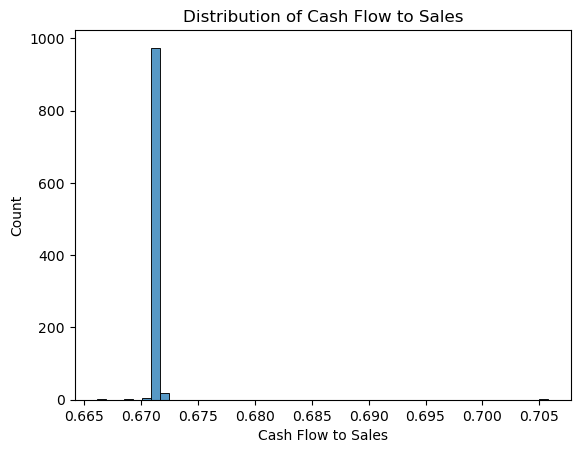

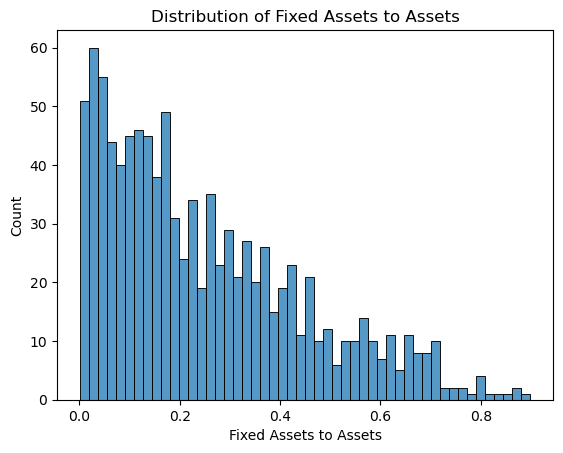

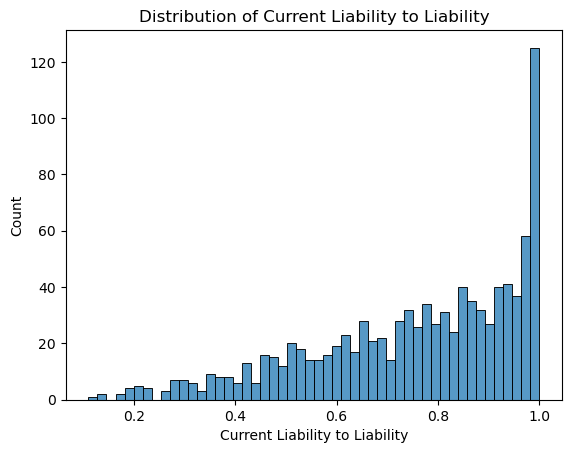

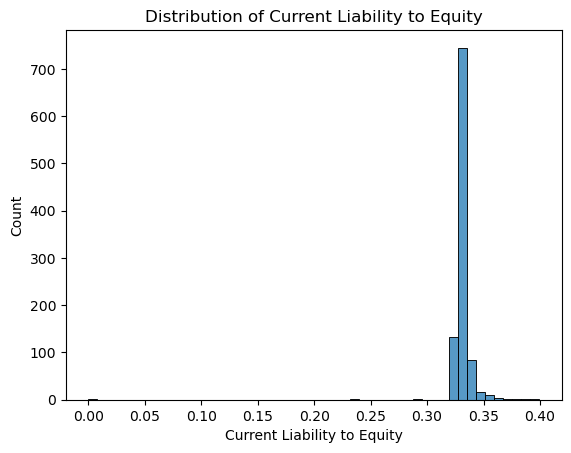

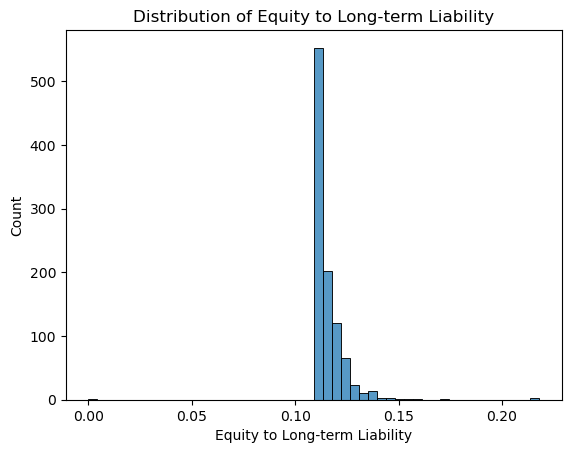

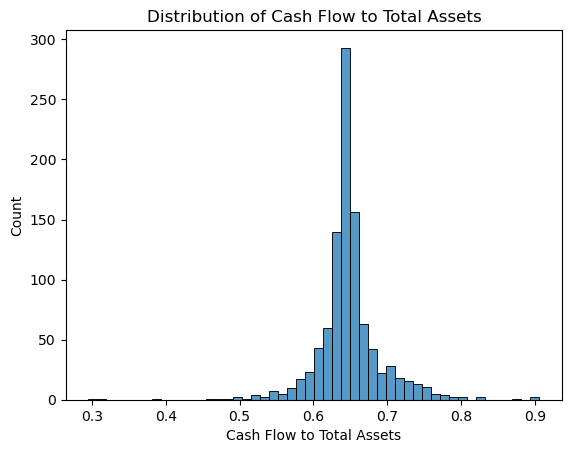

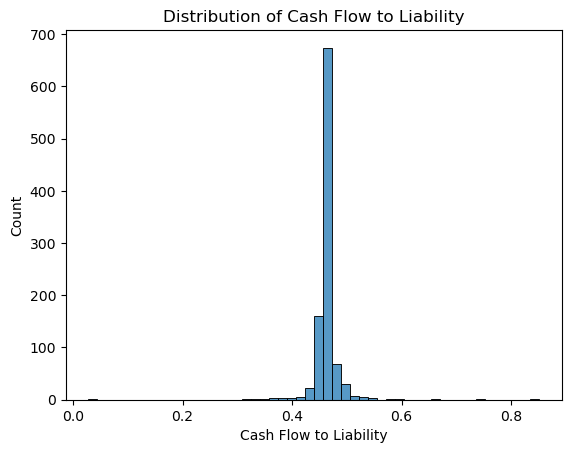

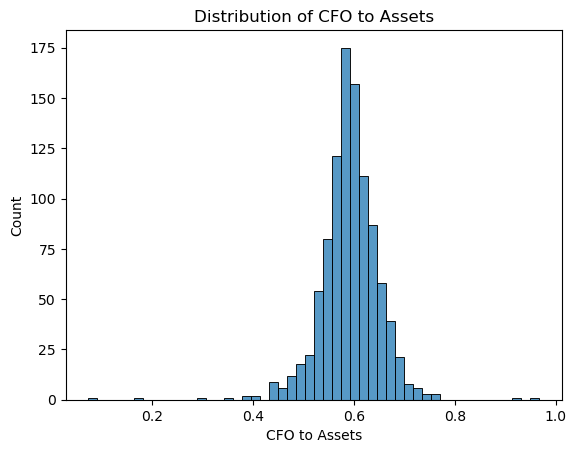

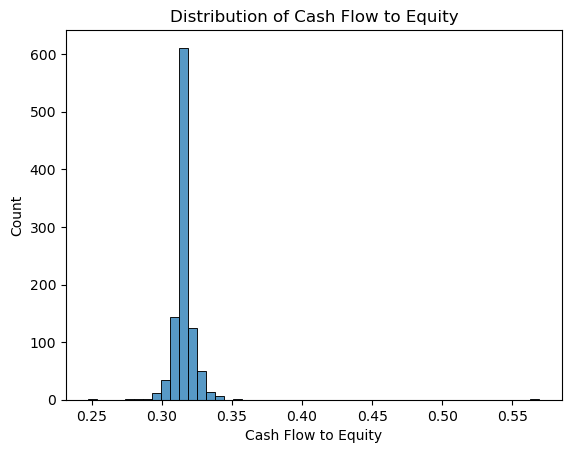

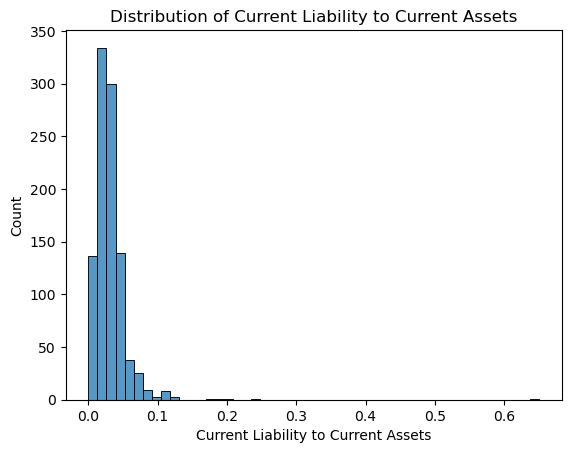

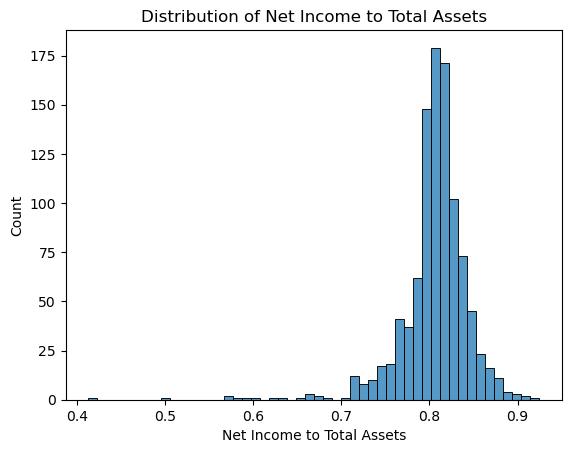

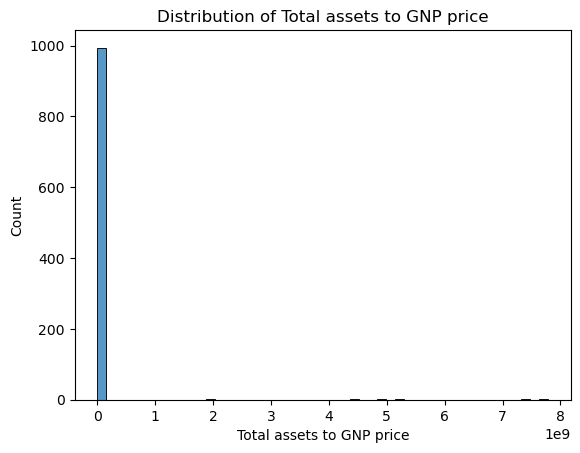

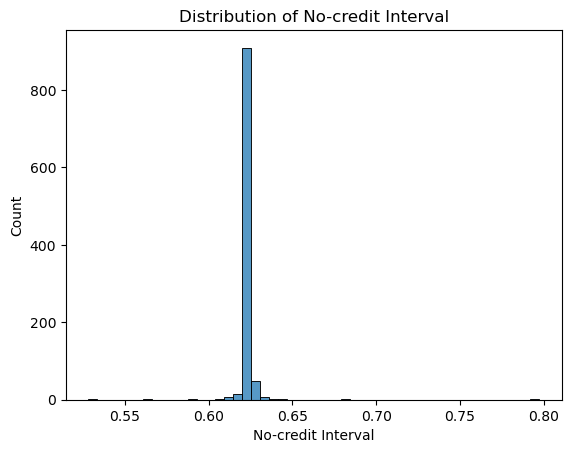

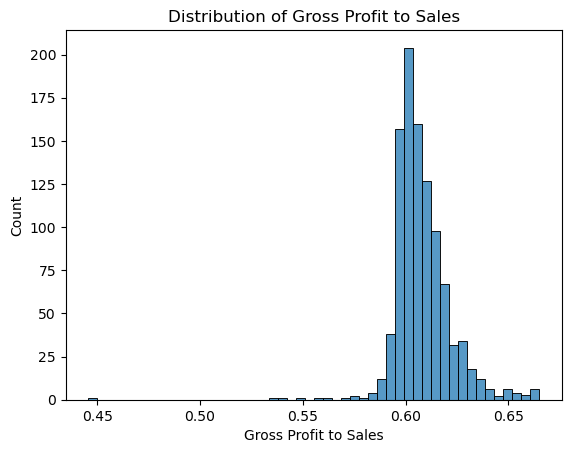

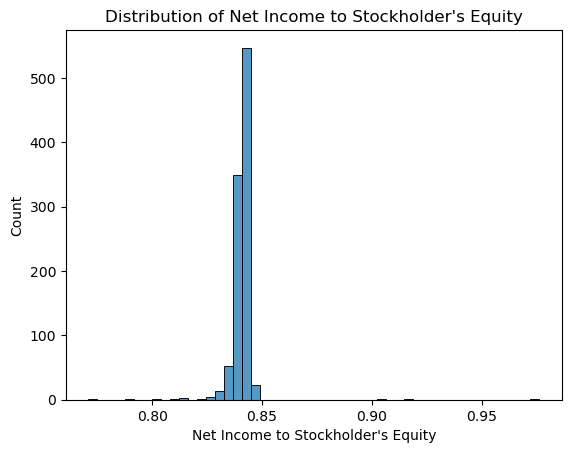

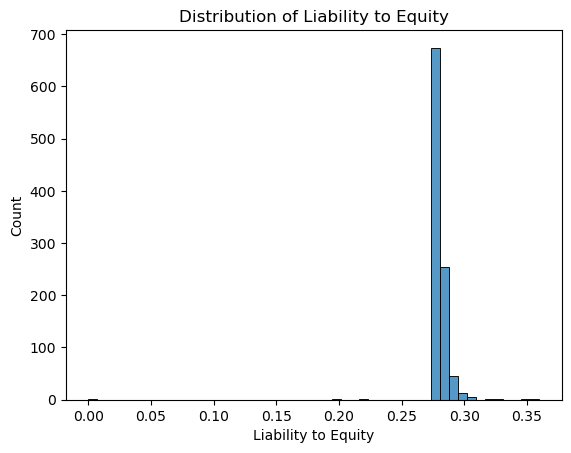

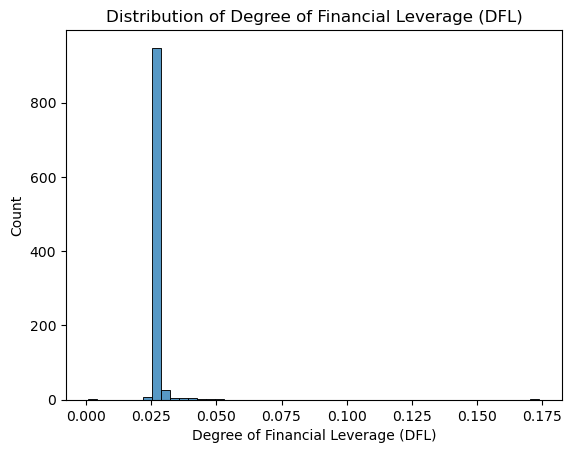

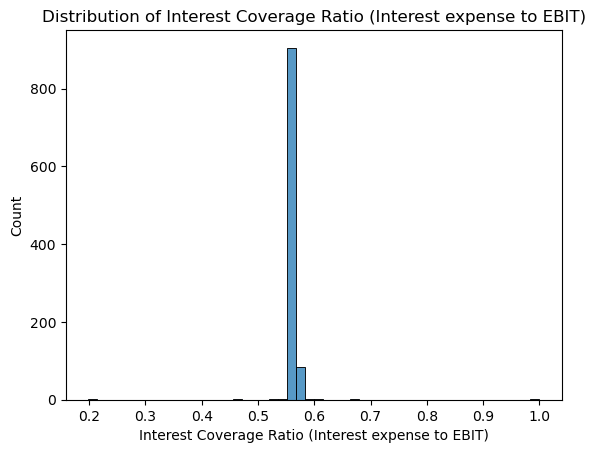

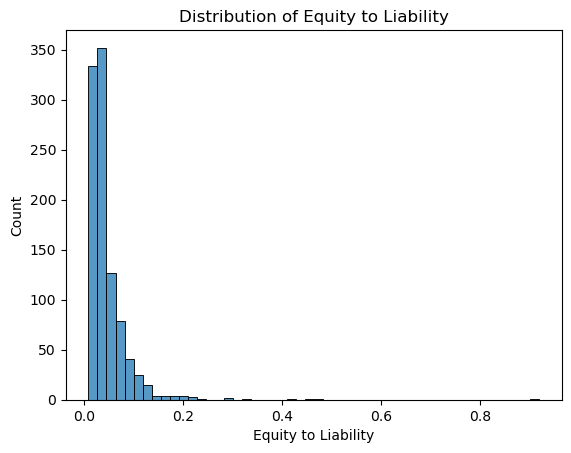

In [ ]:
#do a distribution plot for all features
col_name_list = main_df.columns.to_list()
sample_df = main_df.sample(n=1000, random_state=42)
# for column in col_name_list:
#     sns.histplot(x=sample_df[column])
#     plt.show()

for column in sample_df.select_dtypes(include='number').columns:
    if sample_df[column].nunique() > 1000:
        print(f"skipping {column} due to high cardinality")
        continue #had to resort to skipping because I kept getting a memory error 
    try:
        sns.histplot(sample_df[column].dropna(), bins=50)
        plt.title(f"Distribution of {column}")
        plt.show()
        plt.clf()
        plt.close()
    except MemoryError:
        print(f"Skipping {column} due to memory error")


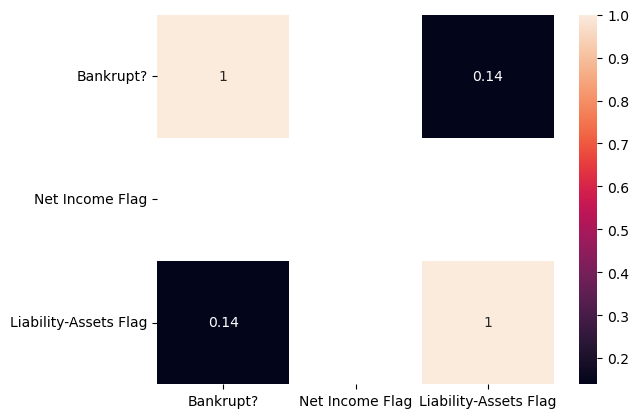

In [8]:
flag_df = main_df[['Bankrupt?', 'Net Income Flag', 'Liability-Assets Flag']].copy()
flag_df['Bankrupt?'] = flag_df['Bankrupt?'].astype('int')
flag_df['Net Income Flag'] = flag_df['Net Income Flag'].astype('int')
flag_df['Liability-Assets Flag'] = flag_df['Liability-Assets Flag'].astype('int')
fl_corr = flag_df.corr()
sns.heatmap(fl_corr, annot=True)
plt.show()

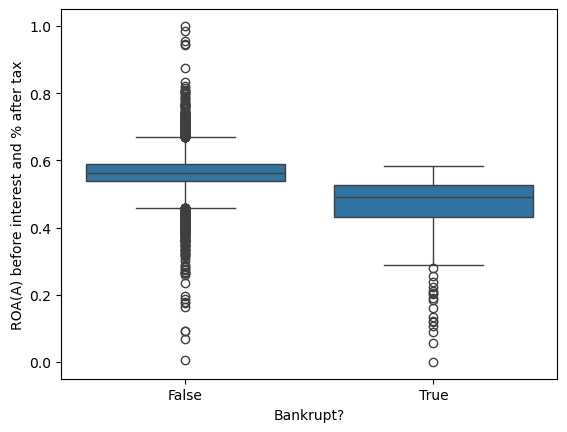

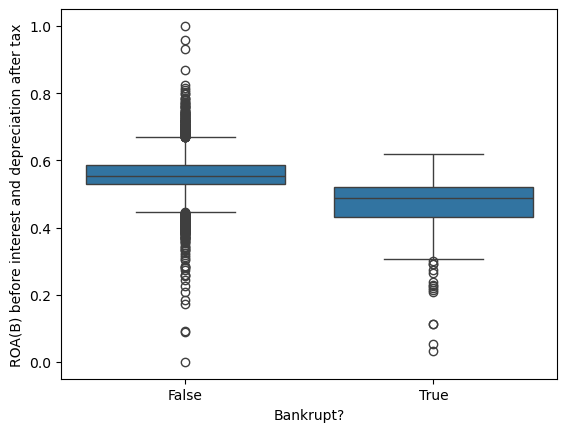

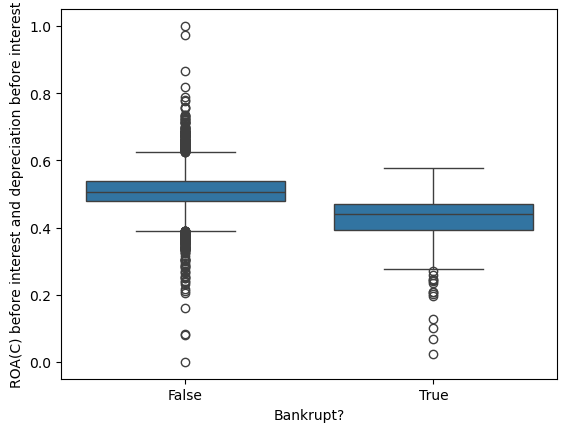

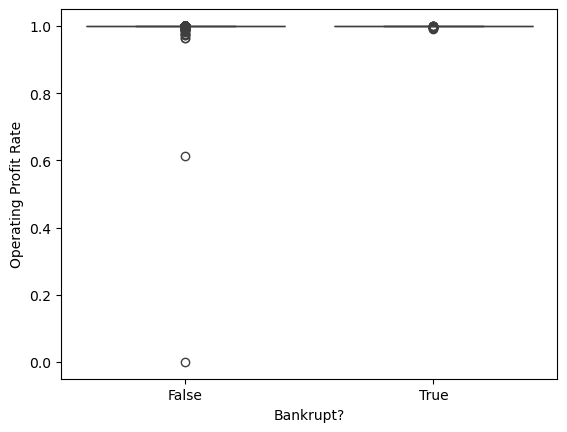

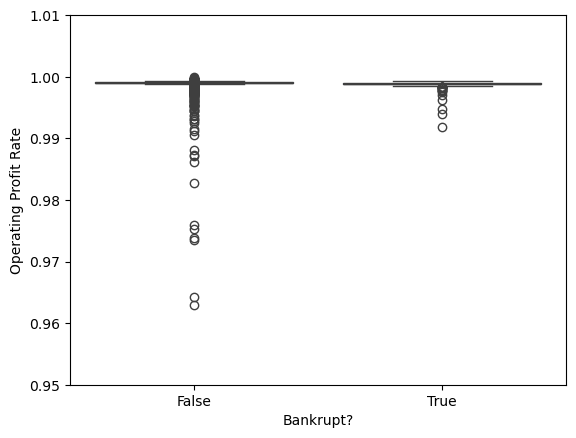

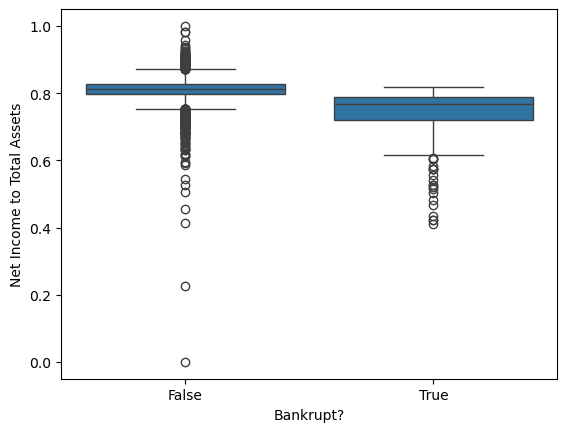

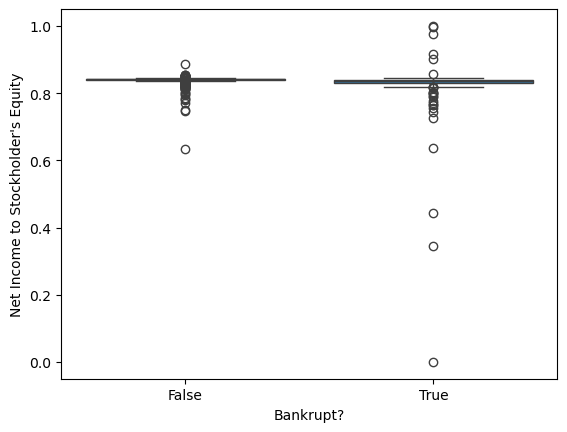

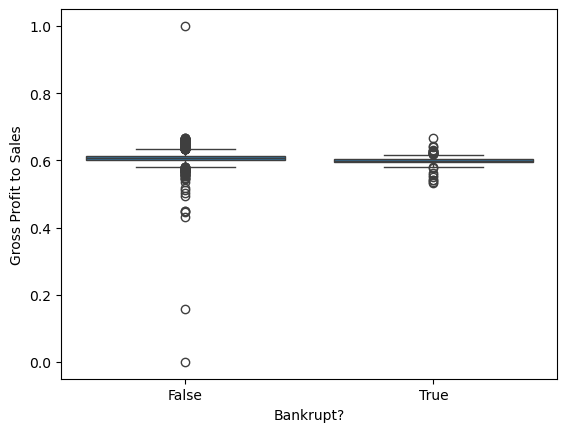

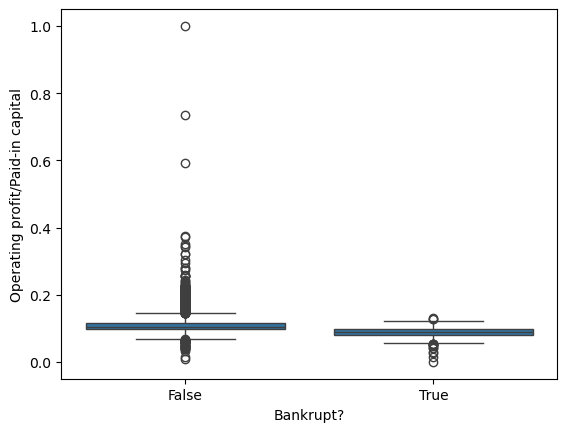

In [9]:
#profitability ratios vs bankruptcy
#1. ROA(a/b/c) vs Bankrupt?
sns.boxplot(main_df, x='Bankrupt?', y='ROA(A) before interest and % after tax')
plt.show()
sns.boxplot(main_df, x='Bankrupt?', y='ROA(B) before interest and depreciation after tax')
plt.show()
sns.boxplot(main_df, x='Bankrupt?', y='ROA(C) before interest and depreciation before interest')
plt.show()
#conclusion: the Bankruptcy status reacts in a very similar manner for each of the three variables. usually bankrupt companies often have lower than usual ROA values. It seems as though for A, B, and C a good chunk of companies with ROA values between 0.4 and 0.5 seem to be bankrupt

#2. Operating Profit Rate vs Bankrupt?
sns.boxplot(main_df, x='Bankrupt?', y='Operating Profit Rate')
plt.show()
sns.boxplot(main_df, x='Bankrupt?', y='Operating Profit Rate')
plt.ylim(0.95, 1.01)
plt.show()
#there doesn't really seem to be a pattern between the two variables as both bankruptcy statuses have high operating PR rates with values around 0.96 to 1.01.

#3. Net Income to Total Assets vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Net Income to Total Assets')
plt.show()
#I dont think there's much of a correlation here either beacuse the ratio value is very close for both categories

#4. Net Income to Stockholder's Equity vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Net Income to Stockholder\'s Equity')
plt.show()

#5. Gross Profit to Sales vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Gross Profit to Sales')
plt.show()

#6. Operating profit/Paid-in capital vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Operating profit/Paid-in capital')
plt.show()

#to conclude all graphs, the most close to a relationship betweeen bankrupcy and all of these ratios combined is that majority 
# of the time, although both categories have ranges that are extremely close to eachother, the bankrupt entities have slightly 
# lower profitability ratio values than the active. Other than that the correlation between the variables are quite low. 

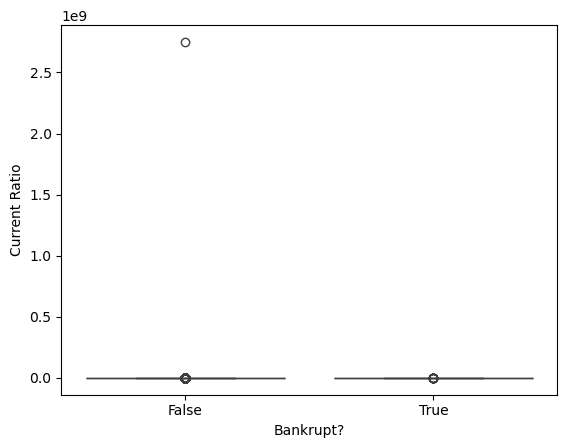

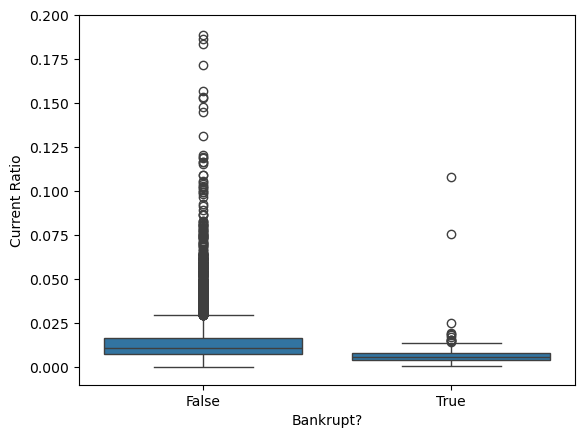

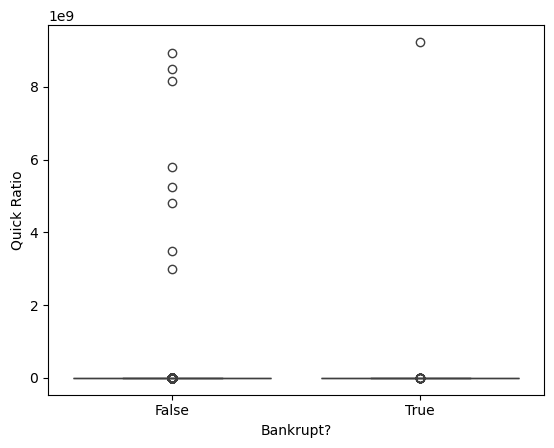

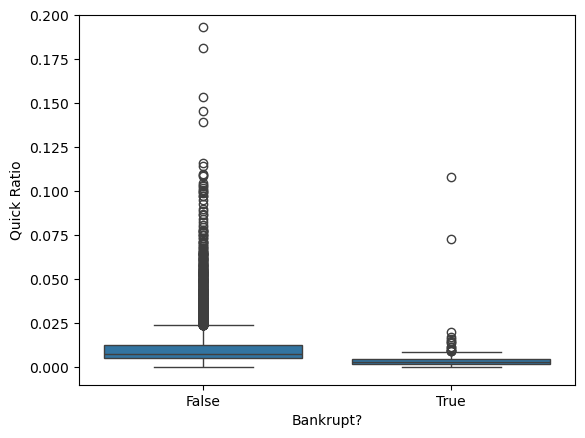

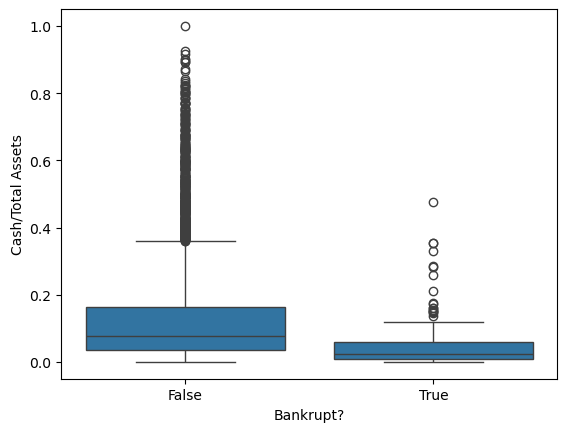

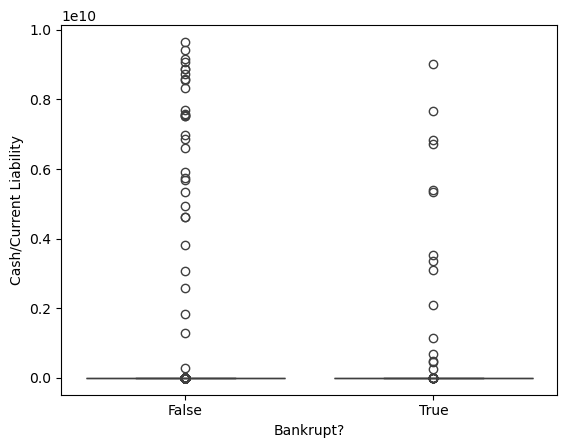

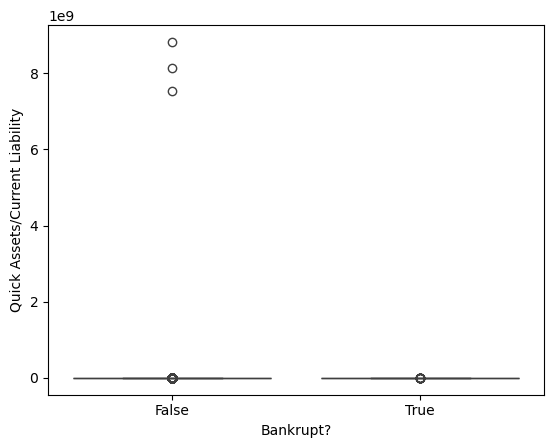

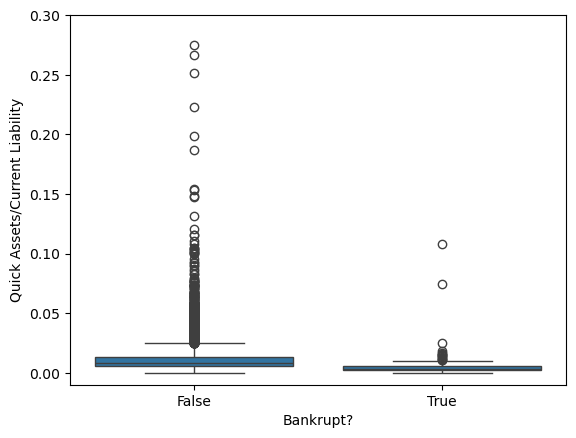

In [10]:
#liquidity ratios vs Bankruptcy
#1. Current Ratio vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Current Ratio')
plt.show()
sns.boxplot(main_df, x='Bankrupt?', y='Current Ratio')
plt.ylim(-0.01, 0.2)
plt.show()

#2. Quick Ratio vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Quick Ratio')
plt.show()
sns.boxplot(main_df, x='Bankrupt?', y='Quick Ratio')
plt.ylim(-0.01, 0.2)
plt.show()

#3. Cash/Total Assets vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Cash/Total Assets')
plt.show()

#4. Cash/Current Liability vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Cash/Current Liability')
plt.show()

#5. Quick Assets/Current Liability vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Quick Assets/Current Liability')
plt.show()
sns.boxplot(main_df, x='Bankrupt?', y='Quick Assets/Current Liability')
plt.ylim(-0.01, 0.3)
plt.show()

#conclusion: similar to before, there doesn't seem to be that distinc of a relationship between the liquidity ratios 
# and the bankruptcy status


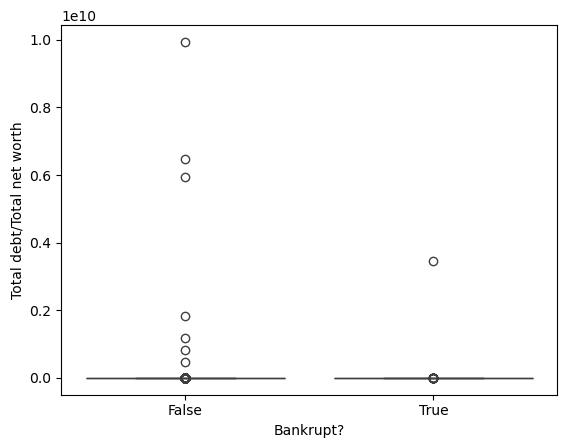

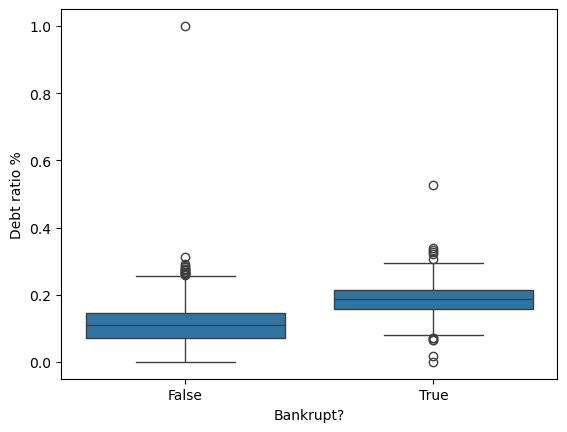

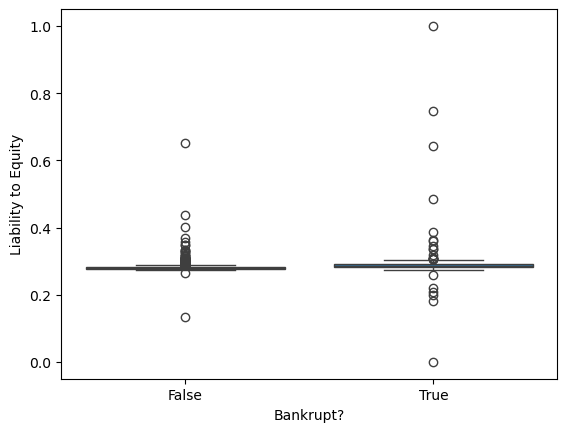

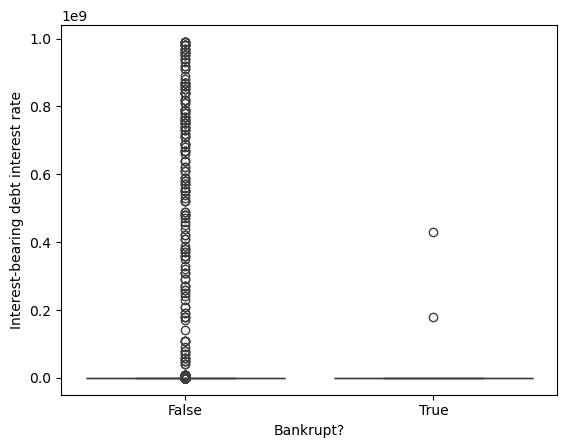

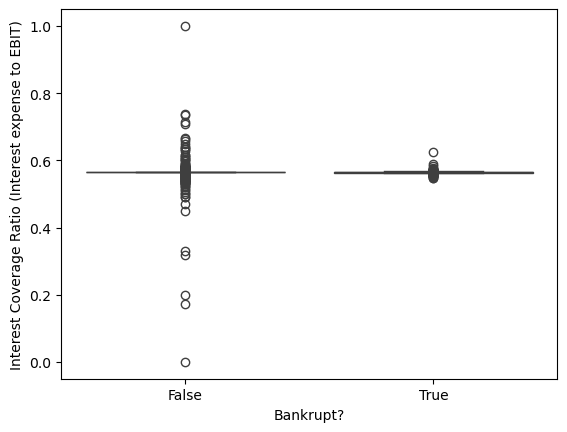

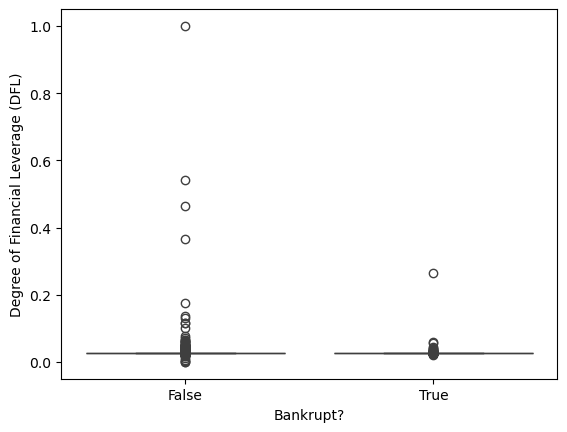

In [11]:
#leverage/debt ratios vs Bankruptcy
#1. Total debt/Total net worth vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Total debt/Total net worth')
plt.show()

#2. Debt ratio % vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Debt ratio %')
plt.show()

#3. Liability to Equity vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Liability to Equity')
plt.show()

#4. Interest-bearing debt interest rate vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Interest-bearing debt interest rate')
plt.show()

#5. Interest Coverage Ratio (Interest expense to EBIT) vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Interest Coverage Ratio (Interest expense to EBIT)')
plt.show()

#6. Degree of Financial Leverage (DFL) vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Degree of Financial Leverage (DFL)')
plt.show()

#conclusion: no direct relationship to bankruptcy

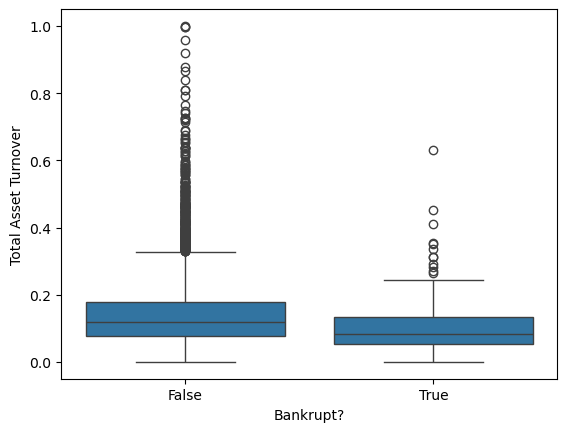

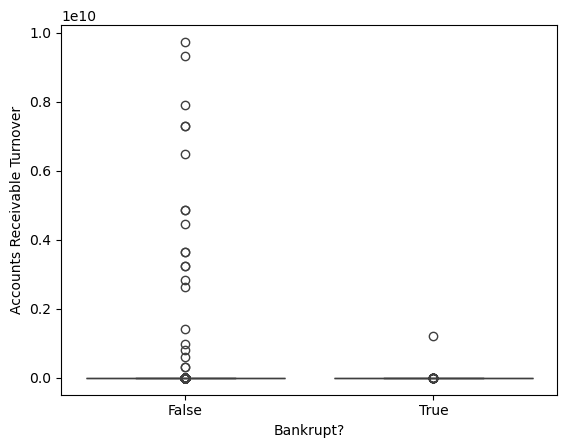

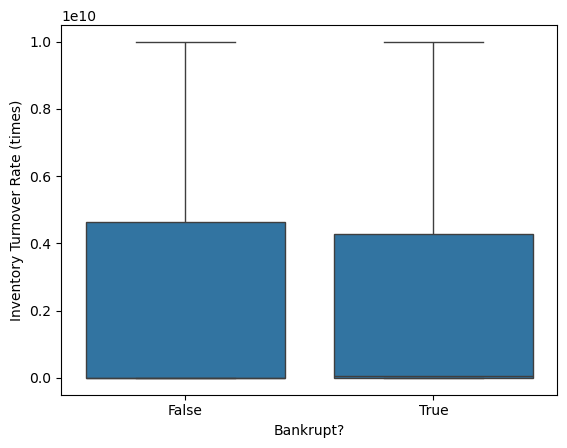

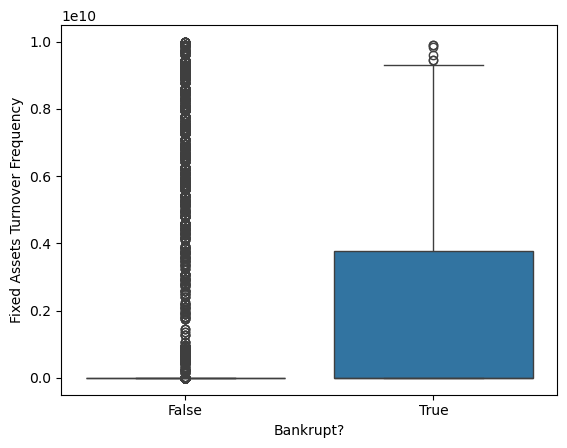

In [12]:
# efficiency ratios
#1. Total Asset Turnover vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Total Asset Turnover')
plt.show()

#2. Accounts Receivable Turnover vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Accounts Receivable Turnover')
plt.show()

#3. Inventory Turnover Rate (times) vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Inventory Turnover Rate (times)')
plt.show()

#4. Fixed Assets Turnover Frequency vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Fixed Assets Turnover Frequency')
plt.show()

#conclusion: total asset turnover seems to have an extreme amount of outliers. Inventory Turnover Rate (times) and fixed 
# assets turnover have really large quartile ranges or a lot of outliers. So basically high noise and barely any correlation 
# given that there isn't a clear pattern here

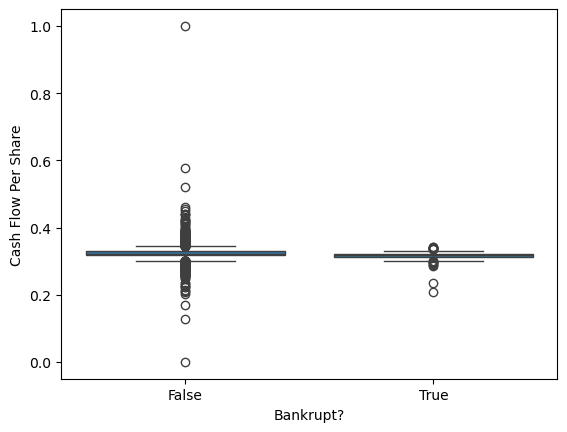

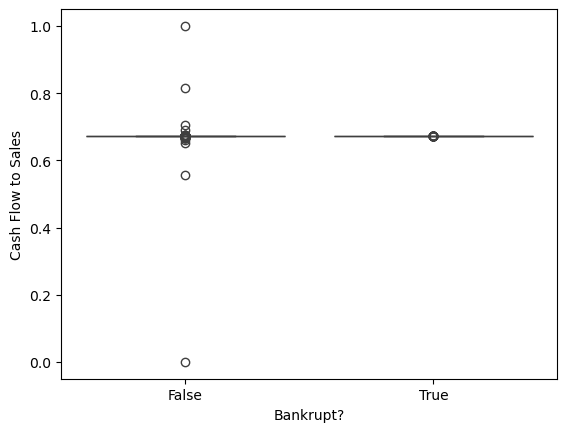

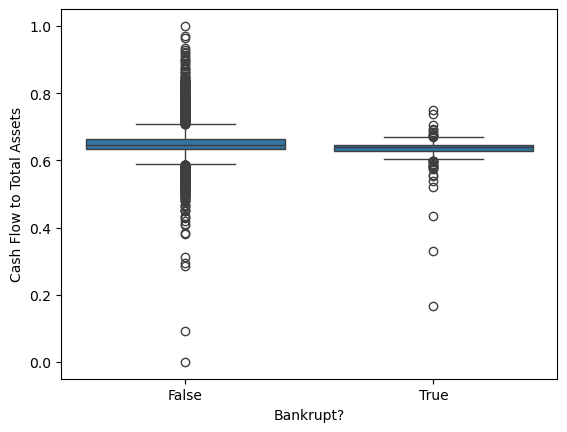

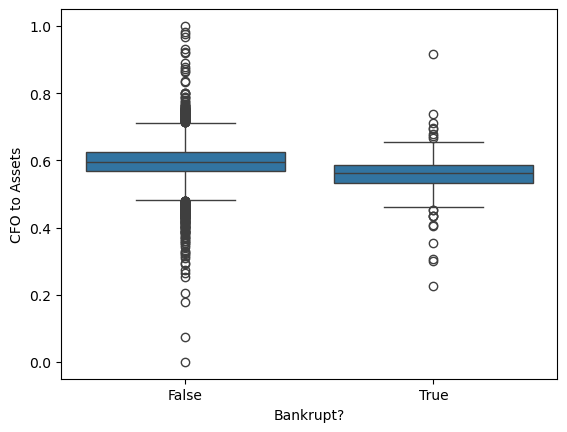

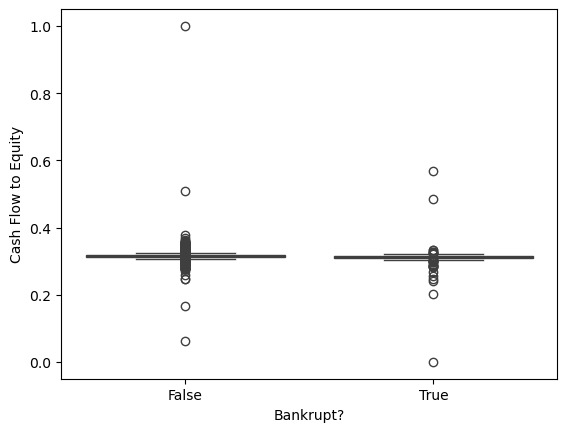

In [13]:
# cash flow Ratios vs Bankruptcy
#1. Cash Flow Per Share vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Cash Flow Per Share')
plt.show()

#2. Cash Flow to Sales vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Cash Flow to Sales')
plt.show()

#3. Cash Flow to Total Assets vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Cash Flow to Total Assets')
plt.show()

#4. CFO to Assets vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='CFO to Assets')
plt.show()

#5. Cash Flow to Equity vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Cash Flow to Equity')
plt.show()

#conclusion: these boxplots have a lot less outliers than the previous set, however they're still not entirely that well 
# correlated to the bankruptcy status

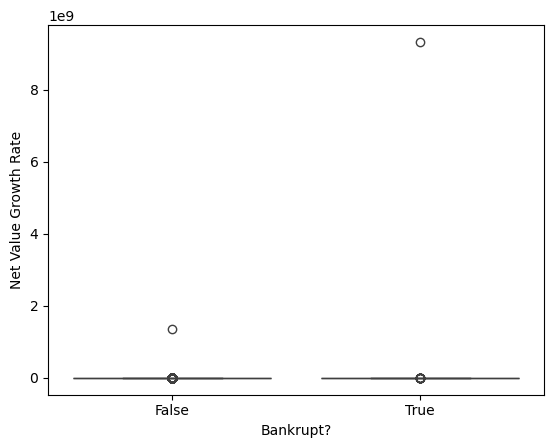

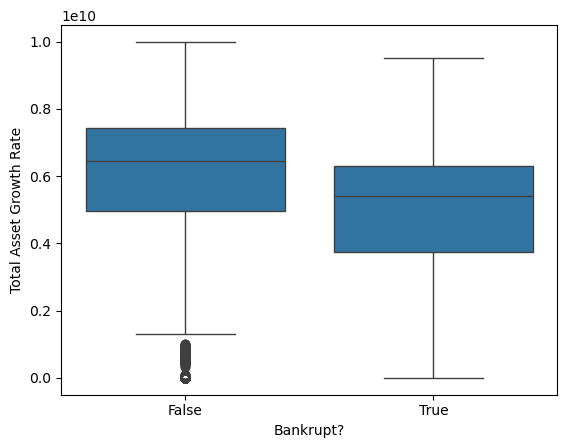

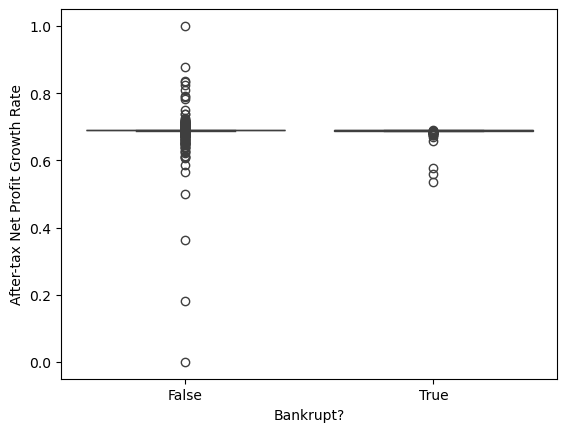

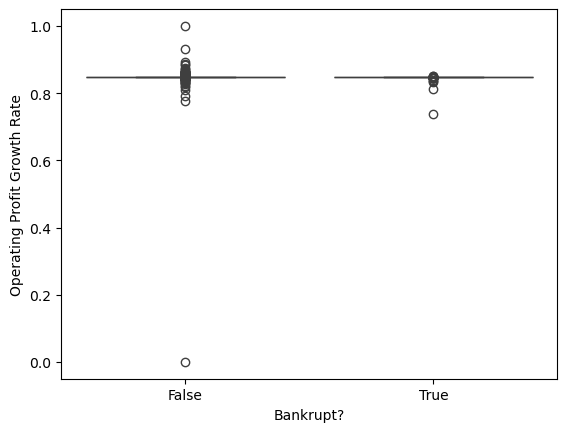

In [14]:
# growth metrics vs Bankruptcy
#1. Net Value Growth Rate vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Net Value Growth Rate')
plt.show()

#2. Total Asset Growth Rate vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Total Asset Growth Rate')
plt.show()

#3. After-tax Net Profit Growth Rate vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='After-tax Net Profit Growth Rate')
plt.show()

#4. Operating Profit Growth Rate vs Bankruptcy
sns.boxplot(main_df, x='Bankrupt?', y='Operating Profit Growth Rate')
plt.show()

#conclusion: again not really showing any patterns between bankruptcy and the variables, but there is definitely much less 
# noise than the previous variables, but the ranges still overlap quite a bit.

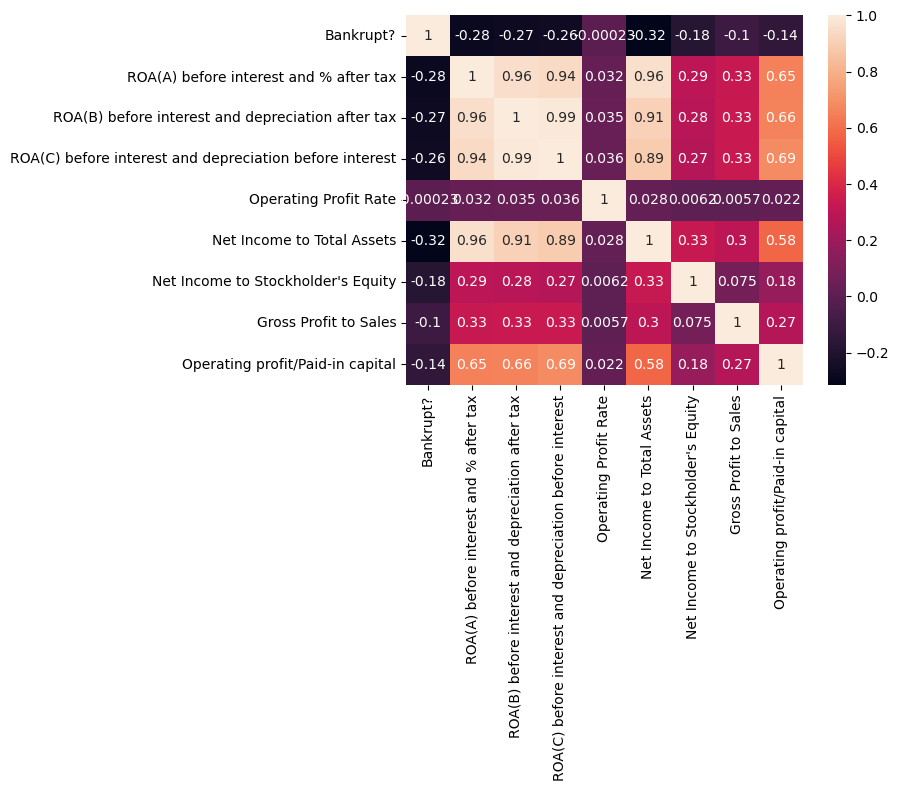

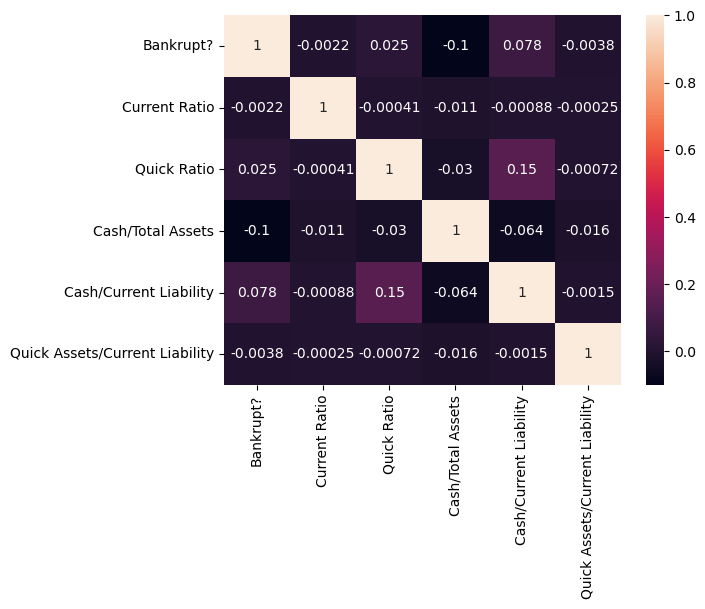

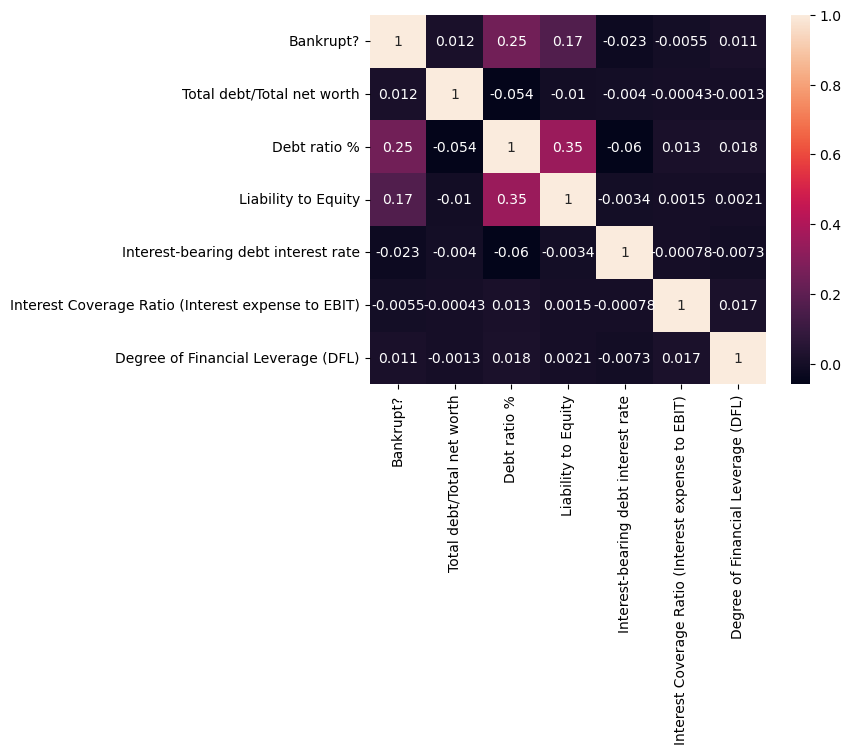

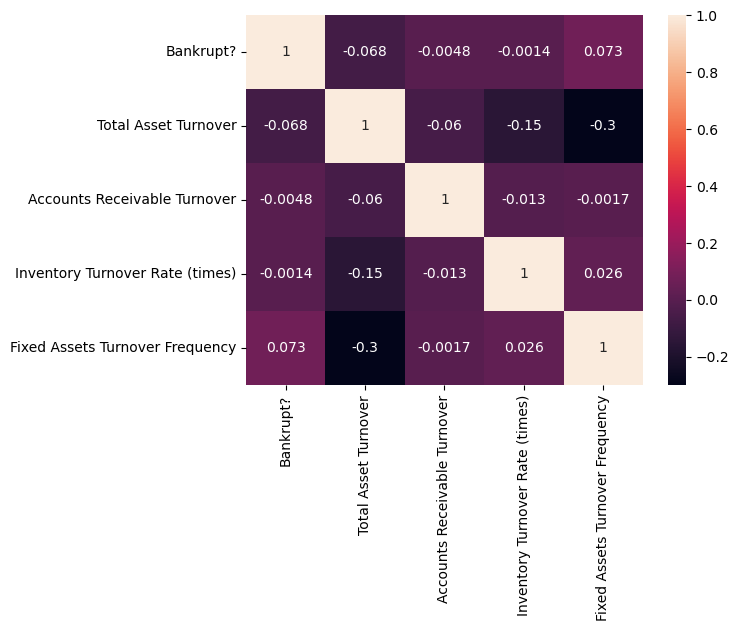

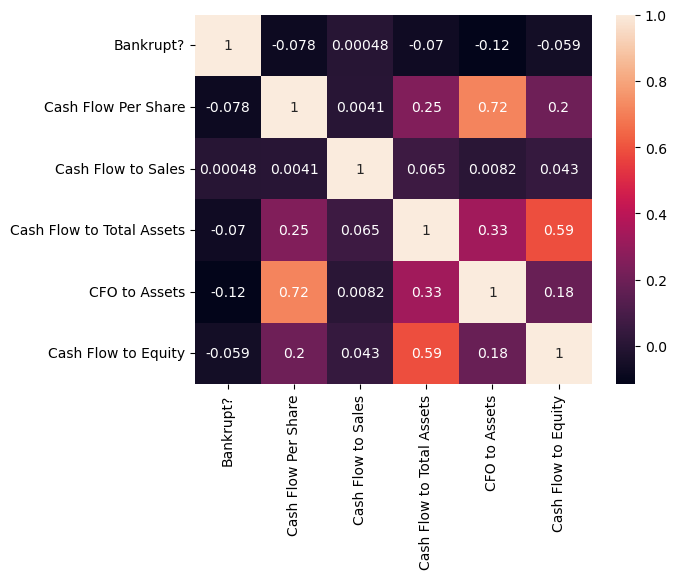

In [15]:
#correlation check
#profitability
profitability_df = main_df[['Bankrupt?', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'ROA(C) before interest and depreciation before interest', 'Operating Profit Rate', 'Net Income to Total Assets', 'Net Income to Stockholder\'s Equity', 'Gross Profit to Sales', 'Operating profit/Paid-in capital']].copy()
profitability_df['Bankrupt?'] = profitability_df['Bankrupt?'].astype('int')
# profitability_df.head()
prof_corr = profitability_df.corr()
sns.heatmap(prof_corr, annot=True)
plt.show()

#liquidity
liquidity_df = main_df[['Bankrupt?', 'Current Ratio', 'Quick Ratio', 'Cash/Total Assets', 'Cash/Current Liability', 'Quick Assets/Current Liability']].copy()
liquidity_df['Bankrupt?'] = liquidity_df['Bankrupt?'].astype('int')
liq_corr = liquidity_df.corr()
sns.heatmap(liq_corr, annot=True)
plt.show()

#leverage
leverage_df = main_df[['Bankrupt?', 'Total debt/Total net worth', 'Debt ratio %', 'Liability to Equity', 'Interest-bearing debt interest rate', 'Interest Coverage Ratio (Interest expense to EBIT)', 'Degree of Financial Leverage (DFL)']].copy()
leverage_df['Bankrupt?'] = leverage_df['Bankrupt?'].astype('int')
lev_corr = leverage_df.corr()
sns.heatmap(lev_corr, annot=True)
plt.show()

#efficiency
efficiency_df = main_df[['Bankrupt?', 'Total Asset Turnover', 'Accounts Receivable Turnover', 'Inventory Turnover Rate (times)', 'Fixed Assets Turnover Frequency']].copy()
efficiency_df['Bankrupt?'] = efficiency_df['Bankrupt?'].astype('int')
eff_corr = efficiency_df.corr()
sns.heatmap(eff_corr, annot=True)
plt.show()
#cash flow
cashflow_df = main_df[['Bankrupt?', 'Cash Flow Per Share', 'Cash Flow to Sales', 'Cash Flow to Total Assets', 'CFO to Assets', 'Cash Flow to Equity']].copy()
cashflow_df['Bankrupt?'] = cashflow_df['Bankrupt?'].astype('int')
cf_corr = cashflow_df.corr()
sns.heatmap(cf_corr, annot=True)
plt.show()

So to conclude with these correlation plots as the cherry on top, ROA for all three entities are basically saying very very similar things. The only other thing that has high correlation is Net Income to Total Assets and the ROA for the entities. The next moderately high correlation out of all the variable combinations is Operating profit/Paid-in Capital to the ROAs and the Net Income to Total Asset. 

With this I think it's safe to chose between one of the ROAs given that all three are saying very similar things. I think ROA(B) would be the best to chose only because it has the highest combined correlation between the other two entities. 

Out of all the correlations (var to Bankruptcy), Debt Ratio has the highest with a value of 0.25.

Additionally Net Income Flag seems to be 1 or True for all values, which means we can drop that column as well.

<center>
  <span style="font-size:2.5em; font-weight:bold;">
    Dimentionality Reduction
  </span>
</center>


In [16]:
dim_df = main_df.drop(['ROA(A) before interest and % after tax', 'ROA(C) before interest and depreciation before interest', 'Net Income Flag'], axis=1)
dim_df.head()

Bankrupt?  ROA(B) before interest and depreciation after tax  \
0       True                                           0.405750   
1       True                                           0.516730   
2       True                                           0.472295   
3       True                                           0.457733   
4       True                                           0.522298   

   Operating Gross Margin  Realized Sales Gross Margin  Operating Profit Rate  \
0                0.601457                     0.601457               0.998969   
1                0.610235                     0.610235               0.998946   
2                0.601450                     0.601364               0.998857   
3                0.583541                     0.583541               0.998700   
4                0.598783                     0.598783               0.998973   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non-industry income and expenditure/revenue  \
0                                     0.302646   
1                                     0.303556   
2                                     0.302035   
3                                     0.303350   
4                                     0.303475   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.780985            1.256969e-04   
1                              0.781506            2.897851e-04   
2                              0.780284            2.361297e-04   
3                              0.781241            1.078888e-04   
4                              0.781550            7.890000e+09   

   Research and development expense rate  Cash flow rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   
2                             25500000.0        0.458521   
3                                    0.0        0.465705   
4                                    0.0        0.462746   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   
2                             0.000790           0.0                 0.177911   
3                             0.000449           0.0                 0.154187   
4                             0.000686           0.0                 0.167502   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   
2                 0.177911                 0.193713   
3                 0.154187                 0.154187   
4                 0.167502                 0.167502   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.169141             0.311664   
1                                 0.208944             0.318137   
2                                 0.180581             0.307102   
3                                 0.193722             0.321674   
4                                 0.212537             0.319162   

   Revenue Per Share (Yuan ¥)  Operating Profit Per Share (Yuan ¥)  \
0                    0.017560                             0.095921   
1                    0.021144                             0.093722   
2                    0.005944                             0.092338   
3                    0.014368                             0.077762   
4                    0.029690                             0.096898   

   Per Share Net profit before tax (Yua

In [17]:
X = dim_df.drop(columns=['Bankrupt?'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)
print(f'num of components to explain 90% variance: {pca.n_components_}')

num of components to explain 90% variance: 45


So PCA is really good for dimentionality reduction and so X_pca basically has the reduced features along with the data

In [18]:
pca_components = pd.DataFrame(
    pca.components_,
    columns=X.columns
)
pca_components.index = [f'PC{i+1}' for i in range(pca_components.shape[0])]
print(len(pca_components.columns.to_list()))
print(pca_components.head())

92
     ROA(B) before interest and depreciation after tax  \
PC1                                           0.233610   
PC2                                           0.086978   
PC3                                          -0.042986   
PC4                                          -0.086492   
PC5                                           0.016742   

     Operating Gross Margin  Realized Sales Gross Margin  \
PC1                0.130348                     0.129970   
PC2               -0.003673                    -0.003961   
PC3               -0.111300                    -0.111235   
PC4                0.165745                     0.166381   
PC5               -0.040470                    -0.040669   

     Operating Profit Rate  Pre-tax net Interest Rate  \
PC1               0.013901                   0.021672   
PC2               0.020999                   0.020320   
PC3               0.038011                   0.031412   
PC4               0.076003                   0.096115   
PC

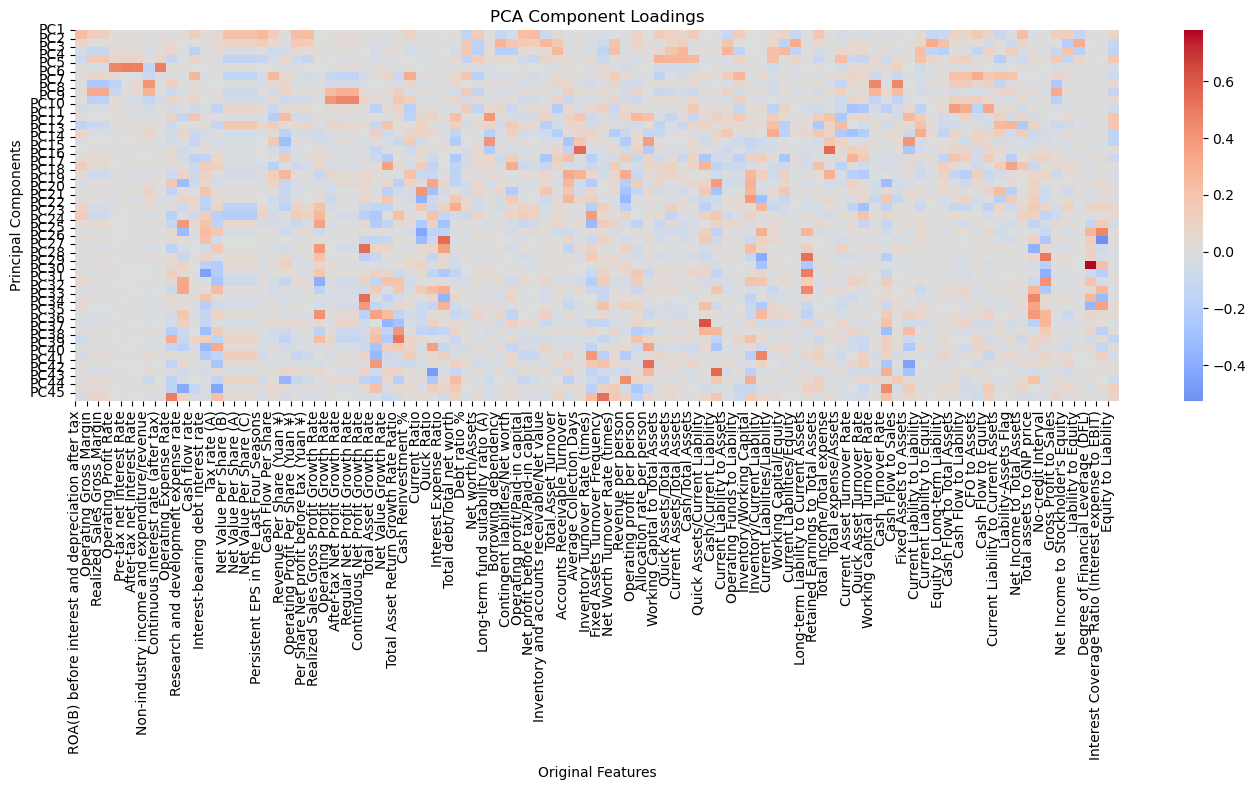

In [19]:
#heatmap of all features
plt.figure(figsize=(14, 8))
ax = sns.heatmap(pca_components, cmap='coolwarm', center=0)

ax.set_yticks(range(len(pca_components)))
ax.set_yticklabels(pca_components.index, rotation=0)
ax.set_xticks(range(len(pca_components.columns)))
ax.set_xticklabels(pca_components.columns, rotation=90)

plt.title("PCA Component Loadings")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.tight_layout()
plt.show()

This is definitely an extremely convoluted graph and I think it would be best not to use PCA. There is a lot of noise and a lot of variables from the univariate and bivariate analysis I did in the EDA. However, we've also seen earlier in the EDA that variables aren't that correlated, and so it wouldn't be the best choices to uce PCA. An alternative is to use feature selection. A really good tool for that is Logistic Regression

In [20]:
log_dim = main_df.drop(['ROA(A) before interest and % after tax', 'ROA(C) before interest and depreciation before interest', 'Net Income Flag'], axis=1)
log_dim.head()

Bankrupt?  ROA(B) before interest and depreciation after tax  \
0       True                                           0.405750   
1       True                                           0.516730   
2       True                                           0.472295   
3       True                                           0.457733   
4       True                                           0.522298   

   Operating Gross Margin  Realized Sales Gross Margin  Operating Profit Rate  \
0                0.601457                     0.601457               0.998969   
1                0.610235                     0.610235               0.998946   
2                0.601450                     0.601364               0.998857   
3                0.583541                     0.583541               0.998700   
4                0.598783                     0.598783               0.998973   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non-industry income and expenditure/revenue  \
0                                     0.302646   
1                                     0.303556   
2                                     0.302035   
3                                     0.303350   
4                                     0.303475   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.780985            1.256969e-04   
1                              0.781506            2.897851e-04   
2                              0.780284            2.361297e-04   
3                              0.781241            1.078888e-04   
4                              0.781550            7.890000e+09   

   Research and development expense rate  Cash flow rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   
2                             25500000.0        0.458521   
3                                    0.0        0.465705   
4                                    0.0        0.462746   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   
2                             0.000790           0.0                 0.177911   
3                             0.000449           0.0                 0.154187   
4                             0.000686           0.0                 0.167502   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   
2                 0.177911                 0.193713   
3                 0.154187                 0.154187   
4                 0.167502                 0.167502   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.169141             0.311664   
1                                 0.208944             0.318137   
2                                 0.180581             0.307102   
3                                 0.193722             0.321674   
4                                 0.212537             0.319162   

   Revenue Per Share (Yuan ¥)  Operating Profit Per Share (Yuan ¥)  \
0                    0.017560                             0.095921   
1                    0.021144                             0.093722   
2                    0.005944                             0.092338   
3                    0.014368                             0.077762   
4                    0.029690                             0.096898   

   Per Share Net profit before tax (Yua

In [21]:
x = dim_df.drop(columns=['Bankrupt?'])
y = log_dim['Bankrupt?'].astype('int')

logreg = LogisticRegression(penalty='l1', solver='liblinear')
selector = SelectFromModel(logreg).fit(x, y)
x_selected = selector.transform(x)

c:\Users\learner\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [22]:
selected_features = x.columns[selector.get_support()]
sel_feat_list = selected_features.tolist()
print(len(sel_feat_list), sel_feat_list)

final_df = pd.DataFrame(x_selected, columns=selected_features)

12 ['ROA(B) before interest and depreciation after tax', 'Operating Profit Rate', 'Tax rate (A)', 'Persistent EPS in the Last Four Seasons', 'Cash Reinvestment %', 'Debt ratio %', 'Total Asset Turnover', 'Current Assets/Total Assets', 'Cash/Total Assets', 'Current Liabilities/Liability', 'Retained Earnings to Total Assets', 'Current Liability to Liability']


<center>
  <span style="font-size:2.5em; font-weight:bold;">
    Data Splitting & Class Balancing
  </span>
</center>


In [23]:
final_df.head()

ROA(B) before interest and depreciation after tax  Operating Profit Rate  \
0                                           0.405750               0.998969   
1                                           0.516730               0.998946   
2                                           0.472295               0.998857   
3                                           0.457733               0.998700   
4                                           0.522298               0.998973   

   Tax rate (A)  Persistent EPS in the Last Four Seasons  Cash Reinvestment %  \
0           0.0                                 0.169141             0.363725   
1           0.0                                 0.208944             0.376709   
2           0.0                                 0.180581             0.368913   
3           0.0                                 0.193722             0.384077   
4           0.0                                 0.212537             0.379690   

   Debt ratio %  Total Asset Turnover  Current Assets/Total Assets  \
0      0.207576              0.086957                     0.190643   
1      0.171176              0.064468                     0.182419   
2      0.207516              0.014993                     0.602806   
3      0.151465              0.089955                     0.225815   
4      0.106509              0.175412                     0.358380   

   Cash/Total Assets  Current Liabilities/Liability  \
0           0.004094                       0.676269   
1           0.014948                       0.308589   
2           0.000991                       0.446027   
3           0.018851                       0.615848   
4           0.014161                       0.975007   

   Retained Earnings to Total Assets  Current Liability to Liability  
0                           0.903225                        0.676269  
1                           0.931065                        0.308589  
2                           0.909903                        0.446027  
3                           0.906902                        0.615848  
4                           0.913850                        0.975007

since there is an extremely small amount of class 0 data points for Bankruptcy, using SMOTE would be ideal since we need to train, test, and validate

C:\Users\learner\AppData\Local\Temp\ipykernel_24532\321650036.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_withtarget_df, x='Bankrupt?', palette='Set2')


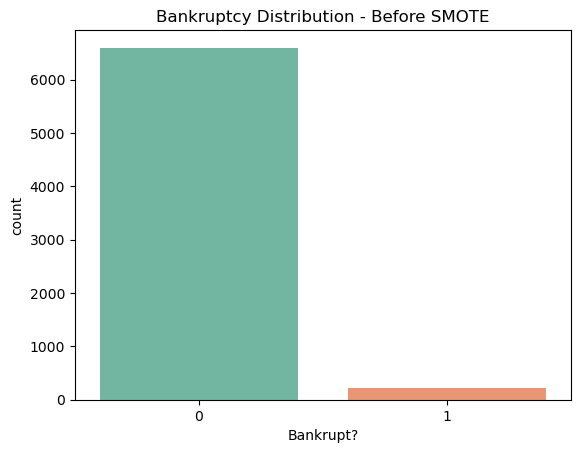

In [24]:
final_withtarget_df = pd.DataFrame(final_df)
final_withtarget_df['Bankrupt?'] = y.values
# final_withtarget_df.head()

#before SMOTE
sns.countplot(data=final_withtarget_df, x='Bankrupt?', palette='Set2')
plt.title('Bankruptcy Distribution - Before SMOTE')
plt.show()

In [25]:
#implementing SMOTE
smote = SMOTE(sampling_strategy='minority')
smote_x = pd.DataFrame(final_df)
smote_y = final_withtarget_df['Bankrupt?']

smote_x, smote_y = smote.fit_resample(smote_x, smote_y)
smote_y.value_counts()


Bankrupt?
1    6599
0    6599
Name: count, dtype: int64

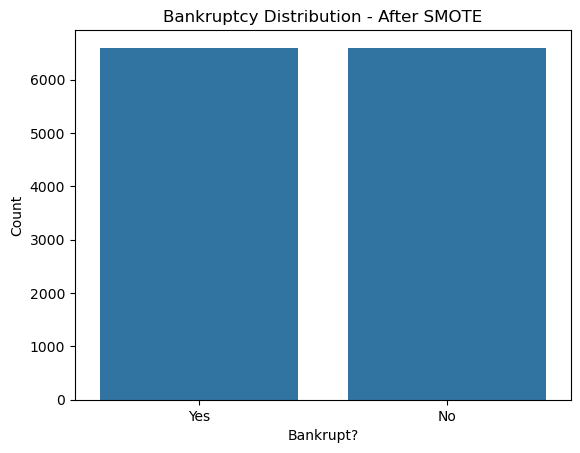

In [26]:
#after SMOTE
val_count = smote_y.value_counts()
sns.barplot(x=val_count.index, y=val_count.values)
plt.title('Bankruptcy Distribution - After SMOTE')
plt.ylabel('Count')
plt.xticks(val_count.index, ['No', 'Yes'])
plt.show()

So, to compare with SMOTE and without SMOTE results, we shall have two pairs of x and y: smote_x, smote_y and final_x, final_y

In [27]:
final_x = pd.DataFrame(final_df)
final_y = final_withtarget_df['Bankrupt?']

x_train_temp, x_temp, y_train_temp, y_temp = train_test_split(final_x, final_y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

smotex_train_temp, smotex_temp, smotey_train_temp, smotey_temp = train_test_split(smote_x, smote_y, test_size=0.4, random_state=42)
smotex_val, smotex_test, smotey_val, smotey_test = train_test_split(smotex_temp, smotey_temp, test_size=0.5, random_state=42)


<center>
  <span style="font-size:2.5em; font-weight:bold;">
    Model Training & Evaluation
  </span>
</center>


In [28]:
#logistic regression
model = LogisticRegression()
model.fit(x_train_temp, y_train_temp)
log_y_val_pred = model.predict(x_val)
print('Before SMOTE - Logistic Regression Validation Report')
print(classification_report(y_val, log_y_val_pred))
print(confusion_matrix(y_val, log_y_val_pred))
print(roc_auc_score(y_val, log_y_val_pred))

model.fit(smotex_train_temp, smotey_train_temp)
log_smotey_val_pred = model.predict(smotex_val)
print('After SMOTE - Logistic Regression Validation Report')
print(classification_report(smotey_val, log_smotey_val_pred))
print(confusion_matrix(smotey_val, log_smotey_val_pred))
print(roc_auc_score(smotey_val, log_smotey_val_pred))

Before SMOTE - Logistic Regression Validation Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1325
           1       0.00      0.00      0.00        39

    accuracy                           0.97      1364
   macro avg       0.49      0.50      0.49      1364
weighted avg       0.94      0.97      0.96      1364

[[1325    0]
 [  39    0]]
0.5
After SMOTE - Logistic Regression Validation Report
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1326
           1       0.87      0.91      0.89      1314

    accuracy                           0.89      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.89      0.89      0.89      2640

[[1150  176]
 [ 123 1191]]
0.8868313394904854


c:\Users\learner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\learner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\learner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
#ridge classifier --> ridge but with threshold to allow classification
model = RidgeClassifierCV(alphas=[1, 10, 100])
model.fit(x_train_temp, y_train_temp)
print("Best alpha:", model.alpha_)
ridge_y_val_pred = model.predict(x_val)
print('Before SMOTE - Ridge Classifier Validation Report')
print(classification_report(y_val, ridge_y_val_pred))
print(confusion_matrix(y_val, ridge_y_val_pred))
print(roc_auc_score(y_val, ridge_y_val_pred))

model.fit(smotex_train_temp, smotey_train_temp)
ridge_smotey_val_pred = model.predict(smotex_val)
print('After SMOTE - Ridge Classifier Validation Report')
print(classification_report(smotey_val, ridge_smotey_val_pred))
print(confusion_matrix(smotey_val, ridge_smotey_val_pred))
print(roc_auc_score(smotey_val, ridge_smotey_val_pred))

Best alpha: 1
Before SMOTE - Ridge Classifier Validation Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1325
           1       0.00      0.00      0.00        39

    accuracy                           0.97      1364
   macro avg       0.49      0.50      0.49      1364
weighted avg       0.94      0.97      0.96      1364

[[1325    0]
 [  39    0]]
0.5
After SMOTE - Ridge Classifier Validation Report
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1326
           1       0.86      0.91      0.88      1314

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640

[[1129  197]
 [ 122 1192]]
0.8792933049580914


c:\Users\learner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\learner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\learner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
#k-NN
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train_temp, y_train_temp)
knn_y_val_pred = model.predict(x_val)
print('Before SMOTE - KNN Validation Report')
print(classification_report(y_val, knn_y_val_pred))
print(confusion_matrix(y_val, knn_y_val_pred))
print(roc_auc_score(y_val, knn_y_val_pred))

model.fit(smotex_train_temp, smotey_train_temp)
knn_smotey_val_pred = model.predict(smotex_val)
print('After SMOTE - KNN Validation Report')
print(classification_report(smotey_val, knn_smotey_val_pred))
print(confusion_matrix(smotey_val, knn_smotey_val_pred))
print(roc_auc_score(smotey_val, knn_smotey_val_pred))

Before SMOTE - KNN Validation Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1325
           1       0.33      0.36      0.35        39

    accuracy                           0.96      1364
   macro avg       0.66      0.67      0.66      1364
weighted avg       0.96      0.96      0.96      1364

[[1297   28]
 [  25   14]]
0.6689211417513304
After SMOTE - KNN Validation Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1326
           1       0.93      1.00      0.96      1314

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640

[[1229   97]
 [   3 1311]]
0.9622822785594743


In [31]:
#decision tree
model = DecisionTreeClassifier()
model.fit(x_train_temp, y_train_temp)
ridge_y_val_pred = model.predict(x_val)
print('Before SMOTE - Decision Tree Validation Report')
print(classification_report(y_val, ridge_y_val_pred))
# tree.plot_tree(model, feature_names=final_df.columns.to_list())
print(confusion_matrix(y_val, ridge_y_val_pred))
print(roc_auc_score(y_val, ridge_y_val_pred))

model.fit(smotex_train_temp, smotey_train_temp)
ridge_smotey_val_pred = model.predict(smotex_val)
print('After SMOTE - Decision Tree Validation Report')
print(classification_report(smotey_val, ridge_smotey_val_pred))
# tree.plot_tree(model, feature_names=final_df.columns.to_list())
print(confusion_matrix(smotey_val, ridge_smotey_val_pred))
print(roc_auc_score(smotey_val, ridge_smotey_val_pred))

Before SMOTE - Decision Tree Validation Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1325
           1       0.19      0.23      0.21        39

    accuracy                           0.95      1364
   macro avg       0.58      0.60      0.59      1364
weighted avg       0.95      0.95      0.95      1364

[[1286   39]
 [  30    9]]
0.6006676342525399
After SMOTE - Decision Tree Validation Report
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1326
           1       0.92      0.94      0.93      1314

    accuracy                           0.93      2640
   macro avg       0.93      0.93      0.93      2640
weighted avg       0.93      0.93      0.93      2640

[[1212  114]
 [  74 1240]]
0.9288552793790505


In [32]:
#neural networks
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
model.fit(x_train_temp, y_train_temp)
nn_y_val_pred = model.predict(x_val)
print('Before SMOTE - Neural Network Validation Report')
print(classification_report(y_val, nn_y_val_pred))
print(confusion_matrix(y_val, nn_y_val_pred))
print(roc_auc_score(y_val, nn_y_val_pred))

model.fit(smotex_train_temp, smotey_train_temp)
nn_smotey_val_pred = model.predict(smotex_val)
print('After SMOTE - Neural Network Validation Report')
print(classification_report(smotey_val, nn_smotey_val_pred))
print(confusion_matrix(smotey_val, nn_smotey_val_pred))
print(roc_auc_score(smotey_val, nn_smotey_val_pred))

Before SMOTE - Neural Network Validation Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1325
           1       0.83      0.26      0.39        39

    accuracy                           0.98      1364
   macro avg       0.91      0.63      0.69      1364
weighted avg       0.97      0.98      0.97      1364

[[1323    2]
 [  29   10]]
0.6274504112239961
After SMOTE - Neural Network Validation Report
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1326
           1       0.89      0.92      0.91      1314

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640

[[1179  147]
 [ 100 1214]]
0.9065183853660886


In [33]:
#random forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_temp, y_train_temp)
rf_y_val_pred = model.predict(x_val)
print('Before SMOTE - Random Forest Validation Report')
print(classification_report(y_val, rf_y_val_pred))
print(confusion_matrix(y_val, rf_y_val_pred))
print(roc_auc_score(y_val, rf_y_val_pred))

model.fit(smotex_train_temp, smotey_train_temp)
rf_smotey_val_pred = model.predict(smotex_val)
print('After SMOTE - Random Forest Validation Report')
print(classification_report(smotey_val, rf_smotey_val_pred))
print(confusion_matrix(smotey_val, rf_smotey_val_pred))
print(roc_auc_score(smotey_val, rf_smotey_val_pred))

Before SMOTE - Random Forest Validation Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1325
           1       0.50      0.10      0.17        39

    accuracy                           0.97      1364
   macro avg       0.74      0.55      0.58      1364
weighted avg       0.96      0.97      0.96      1364

[[1321    4]
 [  35    4]]
0.5497726173197871
After SMOTE - Random Forest Validation Report
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1326
           1       0.95      0.98      0.96      1314

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640

[[1251   75]
 [  22 1292]]
0.9633480719298607


In [34]:
#gradient boosting
model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42, max_features=None)
model.fit(x_train_temp, y_train_temp)
gb_y_val_pred1 = model.predict(x_val)
print('Before SMOTE - Gradient Boosting (all features) Validation Report')
print(classification_report(y_val, gb_y_val_pred1))
print(confusion_matrix(y_val, gb_y_val_pred1))
print(roc_auc_score(y_val, gb_y_val_pred1))

model.fit(smotex_train_temp, smotey_train_temp)
gb_smotey_val_pred1 = model.predict(smotex_val)
print('After SMOTE - Gradient Boosting (all features) Validation Report')
print(classification_report(smotey_val, gb_smotey_val_pred1))
print(confusion_matrix(smotey_val, gb_smotey_val_pred1))
print(roc_auc_score(smotey_val, gb_smotey_val_pred1))

model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42, max_features='sqrt')
model.fit(x_train_temp, y_train_temp)
gb_y_val_pred2 = model.predict(x_val)
print('Before SMOTE - Gradient Boosting (sqrt features) Validation Report')
print(classification_report(y_val, gb_y_val_pred2))
print(confusion_matrix(y_val, gb_y_val_pred2))
print(roc_auc_score(y_val, gb_y_val_pred2))

model.fit(smotex_train_temp, smotey_train_temp)
gb_smotey_val_pred2 = model.predict(smotex_val)
print('After SMOTE - Gradient Boosting (sqrt features) Validation Report')
print(classification_report(smotey_val, gb_smotey_val_pred2))
print(confusion_matrix(smotey_val, gb_smotey_val_pred2))
print(roc_auc_score(smotey_val, gb_smotey_val_pred2))

Before SMOTE - Gradient Boosting (all features) Validation Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1325
           1       0.38      0.13      0.19        39

    accuracy                           0.97      1364
   macro avg       0.68      0.56      0.59      1364
weighted avg       0.96      0.97      0.96      1364

[[1317    8]
 [  34    5]]
0.5610836961780358
After SMOTE - Gradient Boosting (all features) Validation Report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1326
           1       0.91      0.95      0.93      1314

    accuracy                           0.93      2640
   macro avg       0.93      0.93      0.93      2640
weighted avg       0.93      0.93      0.93      2640

[[1204  122]
 [  68 1246]]
0.9281217931499961
Before SMOTE - Gradient Boosting (sqrt features) Validation Report
              precision    recall  f1-score   support

 

<center>
  <span style="font-size:2.5em; font-weight:bold;">
    Comparision of Results
  </span>
</center>

So, looking at the model outputs, all of the assesment metrics show that using SMOTE allows for more consistent results because even if the result was low for post-SMOTE, it's definitely more consistent for both classes whereas no-SMOTE has either high inconsistency between the classes or low metric value. But all in all the post-SMOTE have high metric values and minimal inconsistency between classes

Now, while most metrics are around 0.01 range, when looking at the AUC ROC score for each of the models, there are two that seem to perform the best with Neural Networks as the best out of all models and then KNN as the next best.  

In [35]:
non_SMOTE = [log_y_val_pred, ridge_y_val_pred, knn_y_val_pred, ridge_y_val_pred, nn_y_val_pred, rf_y_val_pred, gb_y_val_pred1, gb_y_val_pred2]
post_SMOTE = [log_smotey_val_pred, ridge_smotey_val_pred, knn_smotey_val_pred, ridge_smotey_val_pred, nn_smotey_val_pred, rf_smotey_val_pred, gb_smotey_val_pred1, gb_smotey_val_pred2]

c:\Users\learner\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1400x600 with 0 Axes>

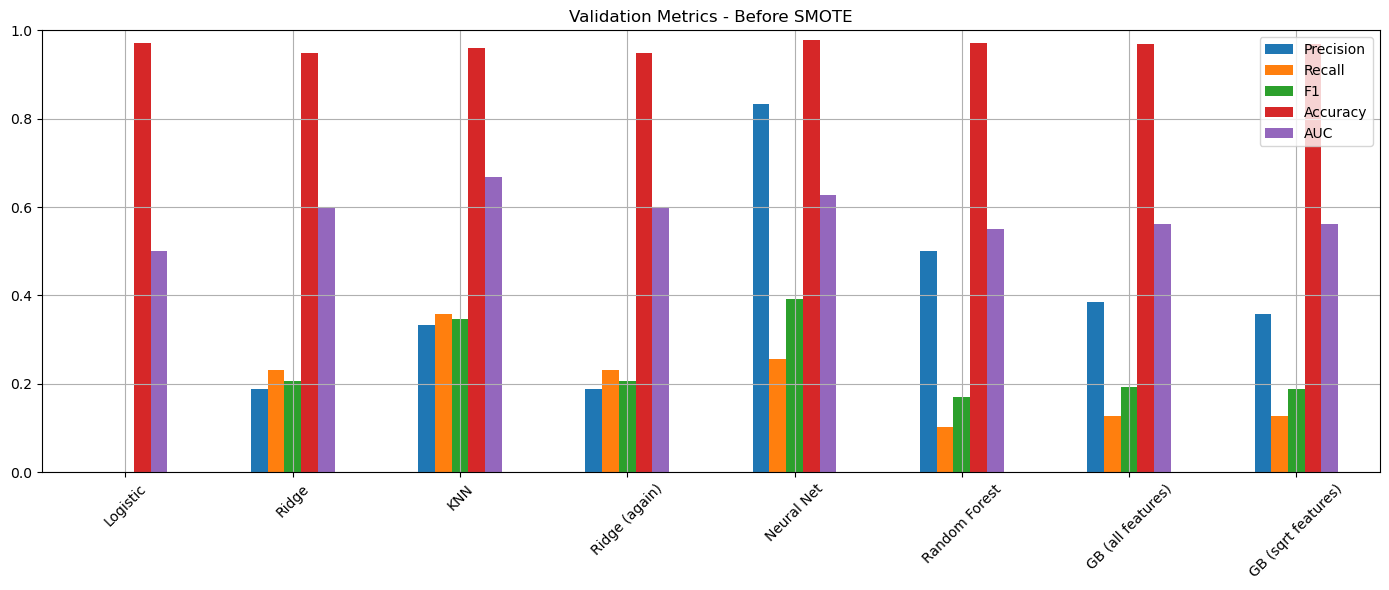

<Figure size 1400x600 with 0 Axes>

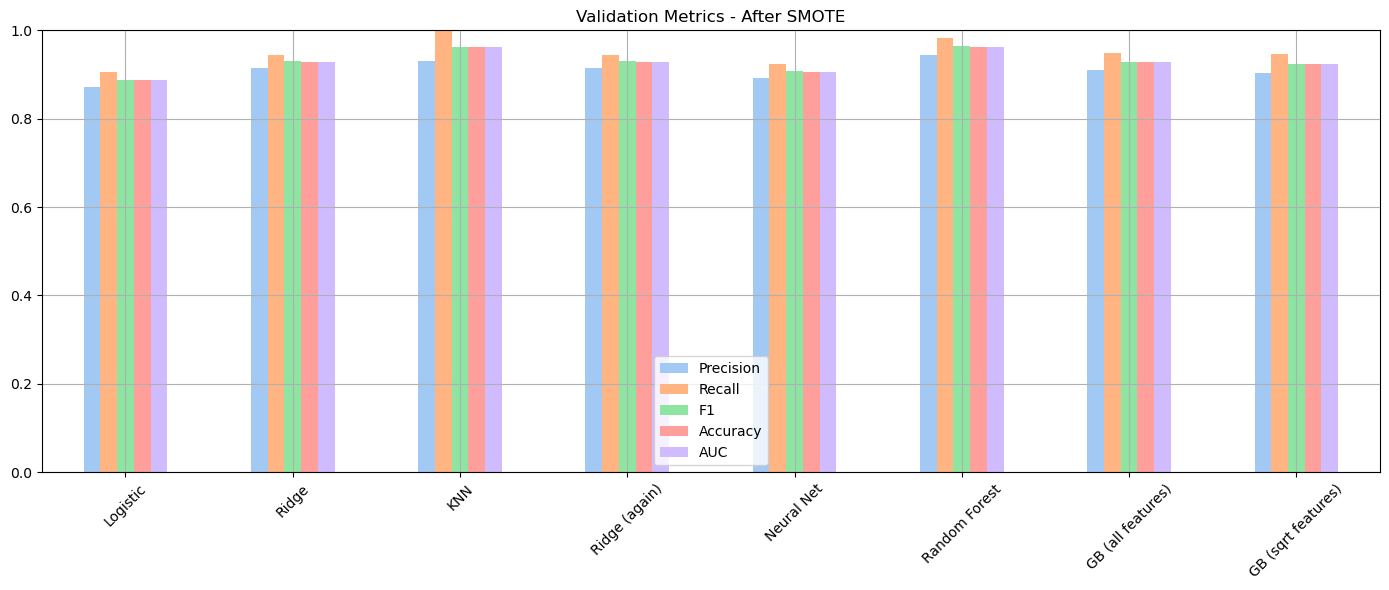

In [36]:
model_names = [
    'Logistic', 'Ridge', 'KNN', 'Ridge (again)', 
    'Neural Net', 'Random Forest', 
    'GB (all features)', 'GB (sqrt features)'
]

# Initialize lists for metrics
metrics_before = []
metrics_after = []

# Collect metrics
for i in range(len(model_names)):
    metrics_before.append([
        precision_score(y_val, non_SMOTE[i]),
        recall_score(y_val, non_SMOTE[i]),
        f1_score(y_val, non_SMOTE[i]),
        accuracy_score(y_val, non_SMOTE[i]),
        roc_auc_score(y_val, non_SMOTE[i])
    ])
    metrics_after.append([
        precision_score(smotey_val, post_SMOTE[i]),
        recall_score(smotey_val, post_SMOTE[i]),
        f1_score(smotey_val, post_SMOTE[i]),
        accuracy_score(smotey_val, post_SMOTE[i]),
        roc_auc_score(smotey_val, post_SMOTE[i])
    ])

# Convert to DataFrames
df_before = pd.DataFrame(metrics_before, columns=['Precision', 'Recall', 'F1', 'Accuracy', 'AUC'], index=model_names)
df_after = pd.DataFrame(metrics_after, columns=['Precision', 'Recall', 'F1', 'Accuracy', 'AUC'], index=model_names)

# Plotting performance bar plots
plt.figure(figsize=(14, 6))
df_before.plot(kind='bar', title='Validation Metrics - Before SMOTE', figsize=(14, 6), ylim=(0, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
df_after.plot(kind='bar', title='Validation Metrics - After SMOTE', figsize=(14, 6), ylim=(0, 1), color=sns.color_palette("pastel"))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

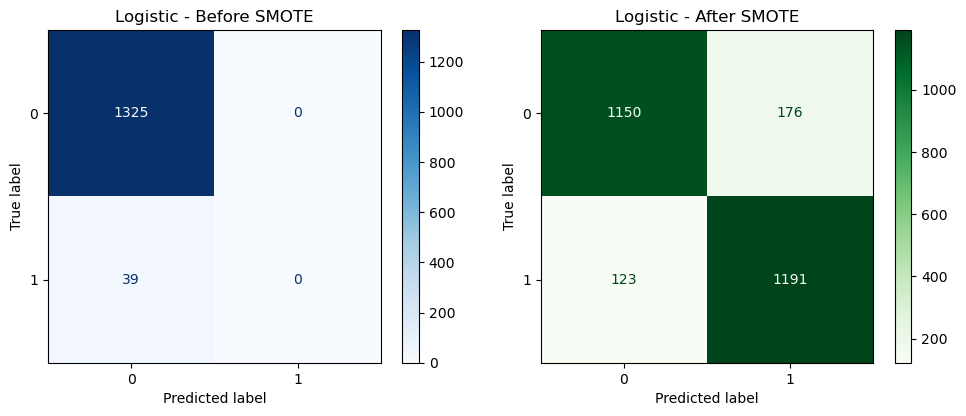

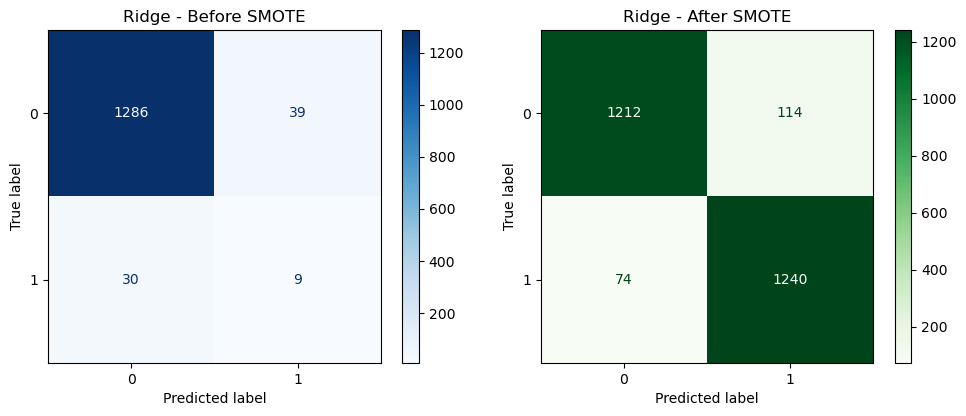

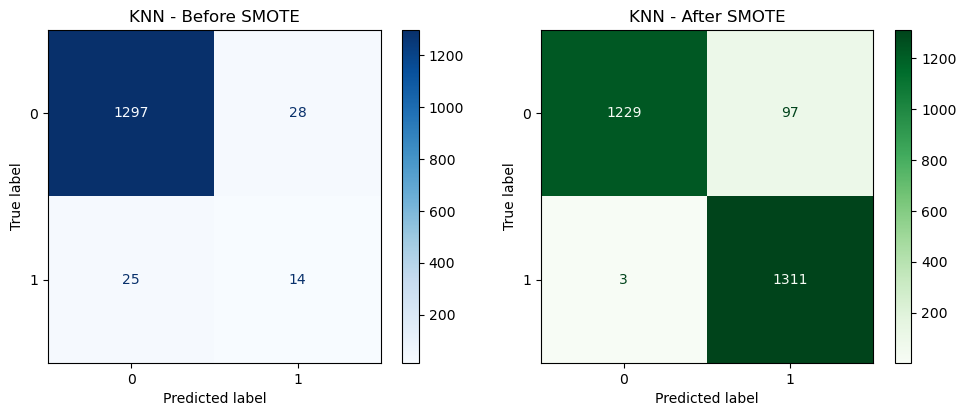

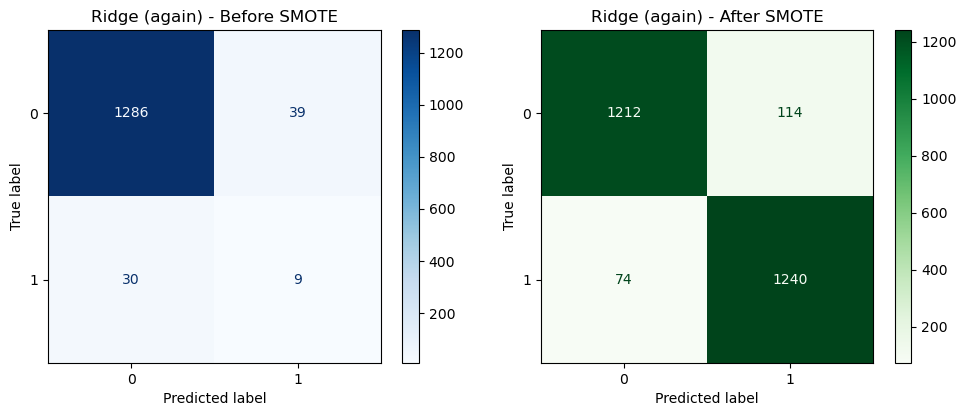

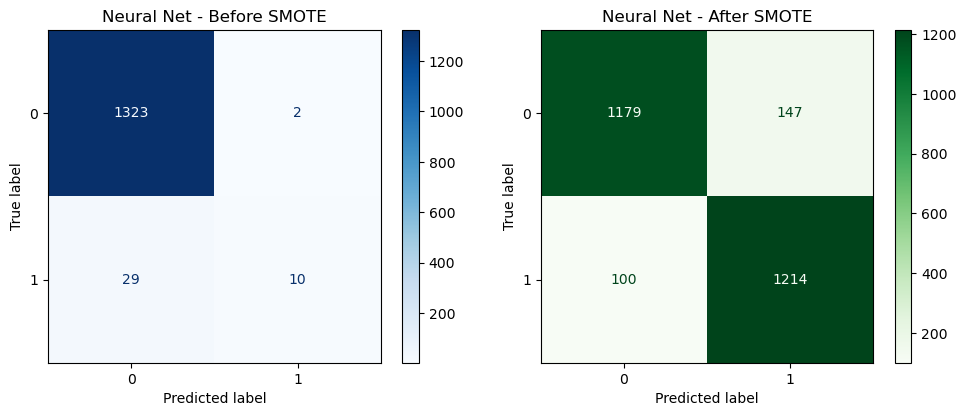

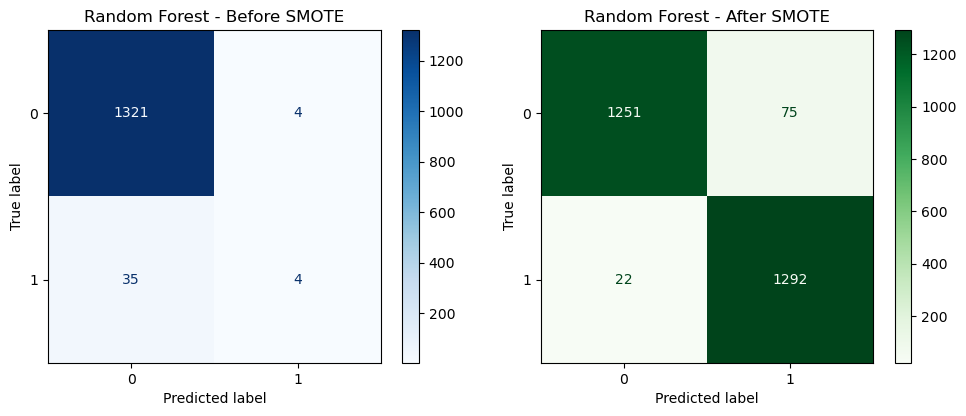

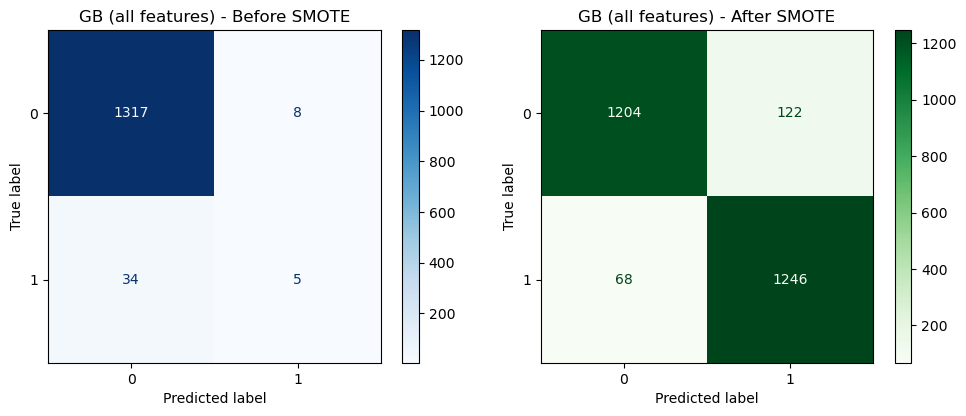

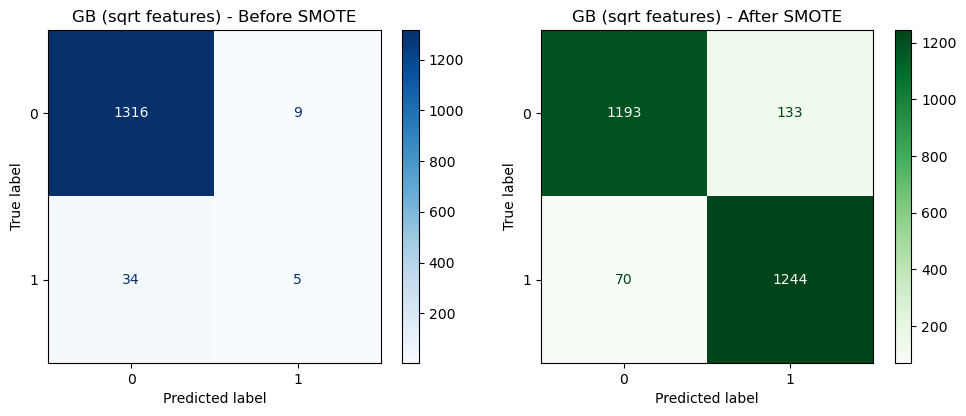

In [37]:
for i in range(len(model_names)):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
    ConfusionMatrixDisplay.from_predictions(y_val, non_SMOTE[i], ax=ax[0], cmap="Blues")
    ax[0].set_title(f"{model_names[i]} - Before SMOTE")
    
    ConfusionMatrixDisplay.from_predictions(smotey_val, post_SMOTE[i], ax=ax[1], cmap="Greens")
    ax[1].set_title(f"{model_names[i]} - After SMOTE")

    plt.tight_layout()
    plt.show()